In [102]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [103]:
import sys
!{sys.executable} -m pip install matplotlib



[notice] A new release of pip available: 22.2.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


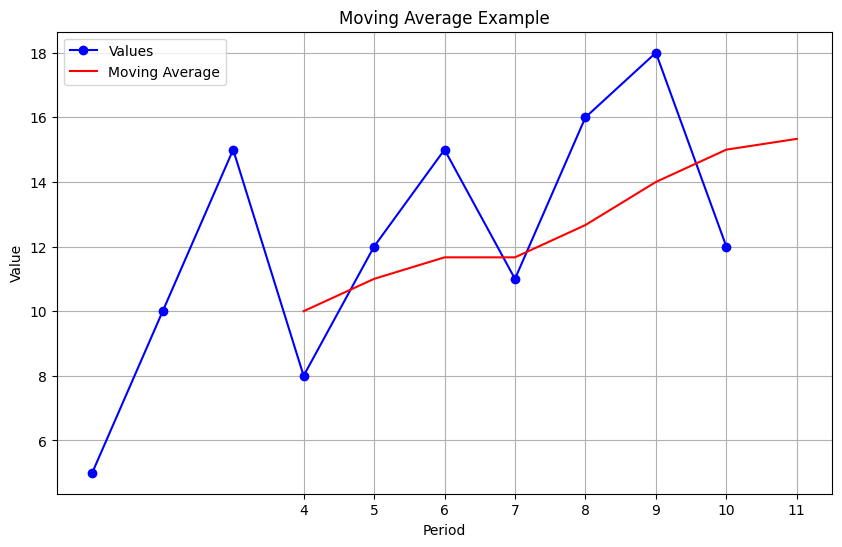

In [104]:
import matplotlib.pyplot as plt
import numpy as np

# Data
data = "1-5, 2-10, 3-15, 4-8, 5-12, 6-15, 7-11, 8-16, 9-18, 10-12"
values = [int(pair.split('-')[1]) for pair in data.split(', ')]

# Calculate moving average
def moving_average(values, window_size):
    weights = np.repeat(1.0, window_size) / window_size
    return np.convolve(values, weights, 'valid')

# Plotting
plt.figure(figsize=(10, 6))

# Plot values in blue
plt.plot(range(1, len(values) + 1), values, marker='o', linestyle='-', color='blue', label='Values')

# Calculate and plot moving average in red 
window_size = 3  
ma_values = moving_average(values, window_size)
ma_periods = range(window_size + 1, len(values) + 2)
plt.plot(ma_periods, ma_values, linestyle='-', color='red', label='Moving Average')

# Add labels and title
plt.xlabel('Period')
plt.ylabel('Value')
plt.title('Moving Average Example')
plt.legend()

# Show all periods on the x-axis
plt.xticks(ma_periods)

# Show the plot
plt.grid(True)
plt.show()


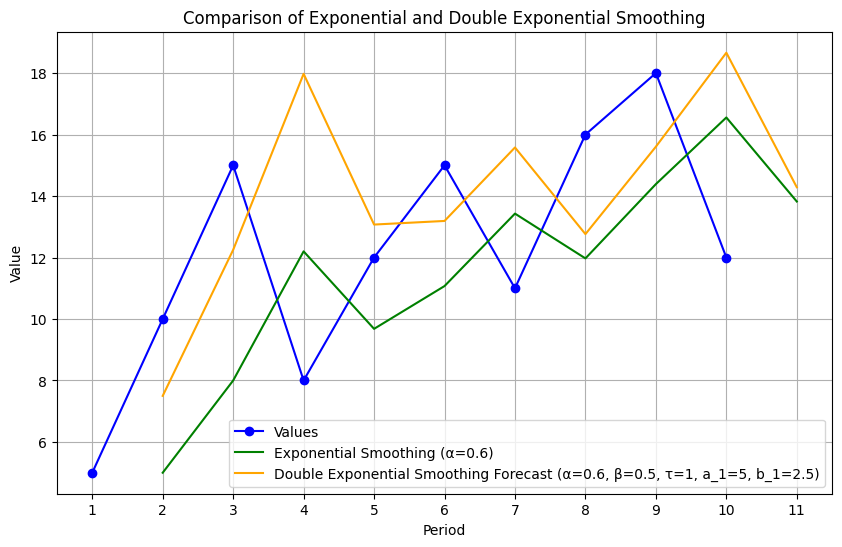

In [107]:
import matplotlib.pyplot as plt
import numpy as np

# Data
data = "1-5, 2-10, 3-15, 4-8, 5-12, 6-15, 7-11, 8-16, 9-18, 10-12"
values = [int(pair.split('-')[1]) for pair in data.split(', ')]

# Exponential smoothing function
def exponential_smoothing(values, alpha):
    smoothed_values = [values[0]]
    for i in range(1, len(values)):
        smoothed_values.append(alpha * values[i] + (1 - alpha) * smoothed_values[-1])
    return smoothed_values

# Double exponential smoothing function
def double_exponential_smoothing(values, alpha, beta, tau, initial_a, initial_b):
    level = [initial_a]
    trend = [initial_b]
    smoothed_forecast = [level[0] + trend[0] * tau]
    
    for i in range(1, len(values)):
        level.append(alpha * values[i] + (1 - alpha) * (level[-1] + trend[-1]))
        trend.append(beta * (level[i] - level[i - 1]) + (1 - beta) * trend[-1])
        smoothed_forecast.append(level[i] + trend[i] * tau)
    
    return smoothed_forecast

# Plotting
plt.figure(figsize=(10, 6))

# Original values
plt.plot(range(1, len(values) + 1), values, marker='o', linestyle='-', color='blue', label='Values')

# Exponential smoothing
alpha = 0.6
smoothed_values = exponential_smoothing(values, alpha)
plt.plot(range(2, len(values) + 2), smoothed_values, linestyle='-', color='green', label=f'Exponential Smoothing (α={alpha})')

# Double exponential smoothing
beta = 0.5
tau = 1
initial_a = 5
initial_b = 2.5
smoothed_forecast = double_exponential_smoothing(values, alpha, beta, tau, initial_a, initial_b)
plt.plot(range(2, len(values) + 2), smoothed_forecast, linestyle='-', color='orange', label=f'Double Exponential Smoothing Forecast (α={alpha}, β={beta}, τ={tau}, a_1={initial_a}, b_1={initial_b})')

# Add labels, legend, and title
plt.xlabel('Period')
plt.ylabel('Value')
plt.title('Comparison of Exponential and Double Exponential Smoothing')
plt.legend()
plt.xticks(range(1, len(values) + 2))
plt.grid(True)
plt.show()


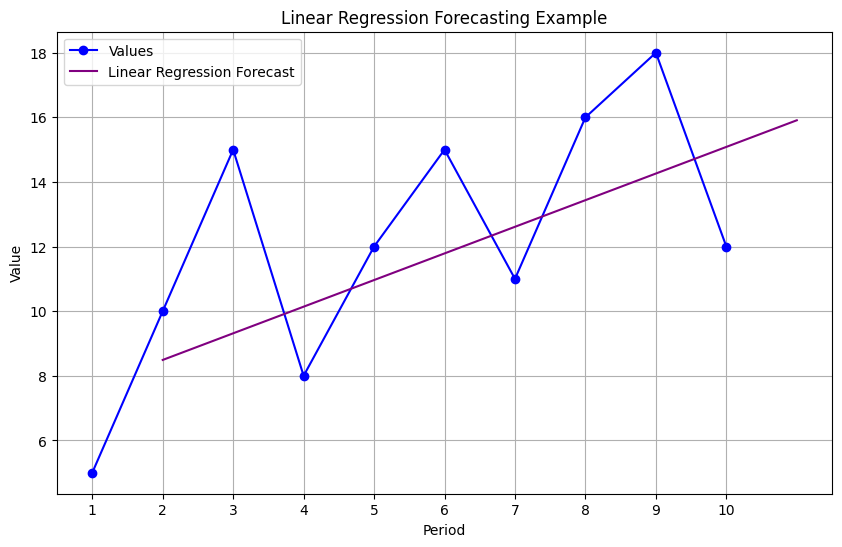

In [108]:
import matplotlib.pyplot as plt
import numpy as np

# Data
data = "1-5, 2-10, 3-15, 4-8, 5-12, 6-15, 7-11, 8-16, 9-18, 10-12"
values = np.array([int(pair.split('-')[1]) for pair in data.split(', ')])
periods = np.arange(1, len(values) + 1)

# Linear regression function
def linear_regression_forecasting(values):
    # Fit a linear regression line
    slope, intercept = np.polyfit(periods, values, 1)
    
    # Calculate forecast values using the linear regression equation
    forecast = slope * periods + intercept
    return forecast

# Plotting
plt.figure(figsize=(10, 6))

# Plot values in blue
plt.plot(periods, values, marker='o', linestyle='-', color='blue', label='Values')

# Apply linear regression forecasting
linear_forecast = linear_regression_forecasting(values)

# Plot linear regression forecast in purple (shifted to the right by one period)
plt.plot(periods + 1, linear_forecast, linestyle='-', color='purple', label='Linear Regression Forecast')

# Add labels and title
plt.xlabel('Period')
plt.ylabel('Value')
plt.title('Linear Regression Forecasting Example')
plt.legend()
plt.xticks(periods)

# Show the plot
plt.grid(True)
plt.show()


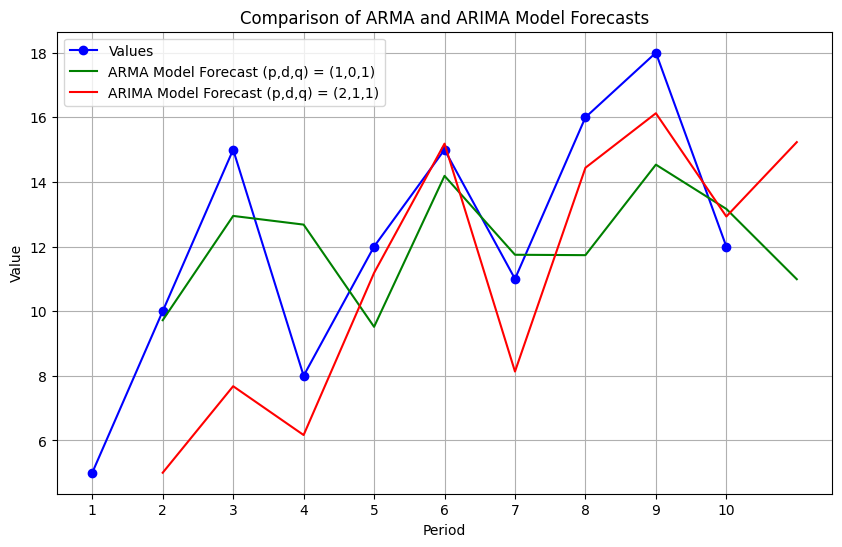

In [111]:
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

# Data
data = "1-5, 2-10, 3-15, 4-8, 5-12, 6-15, 7-11, 8-16, 9-18, 10-12"
values = np.array([int(pair.split('-')[1]) for pair in data.split(', ')])
periods = np.arange(1, len(values) + 1)

# Fit ARMA model 
arma_order = (1, 0, 1)  
arma_model = sm.tsa.ARIMA(endog=values, order=arma_order).fit()
arma_forecast = arma_model.predict(start=1, end=len(values))

# Fit ARIMA model 
arima_order = (2, 1, 1)  
arima_model = sm.tsa.ARIMA(endog=values, order=arima_order).fit()
arima_forecast = arima_model.predict(start=1, end=len(values))

# Plotting
plt.figure(figsize=(10, 6))

# Plot original values
plt.plot(periods, values, marker='o', linestyle='-', color='blue', label='Values')

# Plot ARMA forecast in green
plt.plot(periods + 1, arma_forecast, linestyle='-', color='green', label='ARMA Model Forecast (p,d,q) = (1,0,1)')

# Plot ARIMA forecast in red 
plt.plot(periods + 1, arima_forecast, linestyle='-', color='red', label='ARIMA Model Forecast (p,d,q) = (2,1,1)')

# Add labels and title
plt.xlabel('Period')
plt.ylabel('Value')
plt.title('Comparison of ARMA and ARIMA Model Forecasts')
plt.legend()

# Show all periods on the x-axis
plt.xticks(periods)

# Show the plot
plt.grid(True)
plt.show()


c:\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


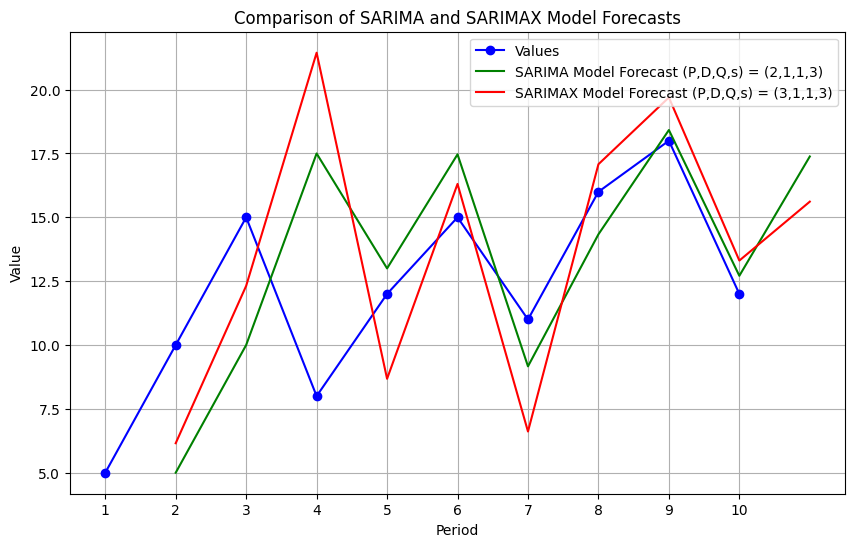

In [114]:
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

# Data
data = "1-5, 2-10, 3-15, 4-8, 5-12, 6-15, 7-11, 8-16, 9-18, 10-12"
values = np.array([int(pair.split('-')[1]) for pair in data.split(', ')])
periods = np.arange(1, len(values) + 1)

# Fit SARIMA model
sarima_order = (1, 1, 1)  
sarima_seasonal_order = (2, 1, 1, 3)   
sarima_model = sm.tsa.SARIMAX(endog=values, order=sarima_order, seasonal_order=sarima_seasonal_order).fit()
sarima_forecast = sarima_model.predict(start=1, end=len(values))

# Fit SARIMAX model with exogenous variables
sarimax_order = (1, 1, 1)  
sarimax_seasonal_order = (3, 1, 1, 3)  
sarimax_model = sm.tsa.SARIMAX(endog=values, order=sarimax_order, seasonal_order=sarimax_seasonal_order, enforce_stationarity=False, enforce_invertibility=False).fit()
sarimax_forecast = sarimax_model.predict(start=1, end=len(values))

# Plotting
plt.figure(figsize=(10, 6))

# Plot original values
plt.plot(periods, values, marker='o', linestyle='-', color='blue', label='Values')

# Plot SARIMA forecast in green
plt.plot(periods + 1, sarima_forecast, linestyle='-', color='green', label='SARIMA Model Forecast (P,D,Q,s) = (2,1,1,3)')

# Plot SARIMAX forecast in red
plt.plot(periods + 1, sarimax_forecast, linestyle='-', color='red', label='SARIMAX Model Forecast (P,D,Q,s) = (3,1,1,3)')

# Add labels and title
plt.xlabel('Period')
plt.ylabel('Value')
plt.title('Comparison of SARIMA and SARIMAX Model Forecasts')
plt.legend()

# Show all periods on the x-axis
plt.xticks(periods)

# Show the plot
plt.grid(True)
plt.show()


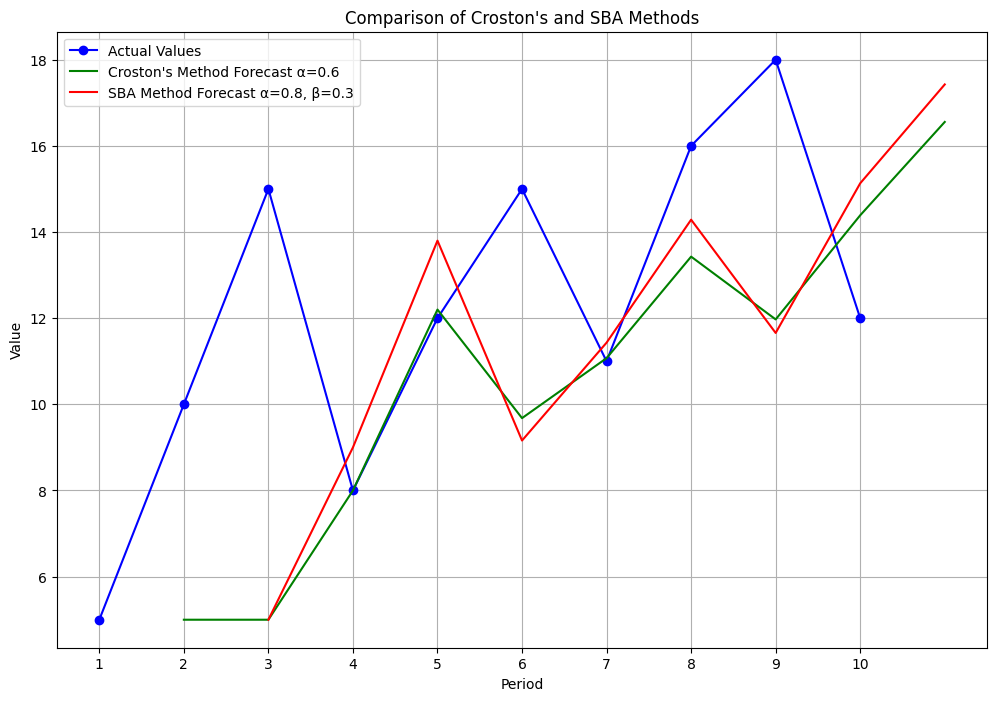

In [117]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Define Croston function
def Croston(ts, extra_periods=1, alpha=0.6):
    d = np.array(ts)
    cols = len(d)
    d = np.append(d, [np.nan] * extra_periods)

    a, p, f = np.full((3, cols + extra_periods), np.nan)
    q = 1

    first_occurrence = np.argmax(d[:cols] > 0)
    a[0] = d[first_occurrence]
    p[0] = 1 + first_occurrence
    f[0] = a[0] / p[0]
    
    for t in range(0, cols):
        if d[t] > 0:
            a[t + 1] = alpha * d[t] + (1 - alpha) * a[t]
            p[t + 1] = alpha * q + (1 - alpha) * p[t]
            f[t + 1] = a[t + 1] / p[t + 1]
            q = 1           
        else:
            a[t + 1] = a[t]
            p[t + 1] = p[t]
            f[t + 1] = f[t]
            q += 1

    a[cols:] = a[cols - 1]
    p[cols:] = p[cols - 1]
    f[cols:] = f[cols - 1]
                      
    return pd.DataFrame.from_dict({"Forecast": f})

# Define SBA function
def SBA(ts, extra_periods=1, alpha=0.8, beta=0.3):
    d = np.array(ts)
    cols = len(d)
    d = np.append(d, [np.nan] * extra_periods)

    a, p, f = np.full((3, cols + extra_periods), np.nan)
    q = 1

    first_occurrence = np.argmax(d[:cols] > 0)
    a[first_occurrence] = d[first_occurrence]
    p[first_occurrence] = 1

    if first_occurrence > 0:
        f[:first_occurrence+1] = d[first_occurrence] / 1

    for t in range(first_occurrence, cols - 1):
        if d[t] > 0:
            a[t + 1] = alpha * d[t] + (1 - alpha) * a[t]
            p[t + 1] = beta * q + (1 - beta) * p[t]
            f[t + 1] = a[t + 1] / p[t + 1]
            q = 1
        else:
            a[t + 1] = a[t]
            p[t + 1] = p[t]
            f[t + 1] = f[t]
            q += 1

    a[cols:] = a[cols - 1]
    p[cols:] = p[cols - 1]
    f[cols:] = f[cols - 1]

    return pd.DataFrame.from_dict({"Forecast": f})

# Data
data = "1-5, 2-10, 3-15, 4-8, 5-12, 6-15, 7-11, 8-16, 9-18, 10-12"
values = np.array([int(pair.split('-')[1]) for pair in data.split(', ')])
periods = np.arange(1, len(values) + 1)

# Forecast using Croston's method
croston_df = Croston(values)

# Forecast using SBA method
sba_df = SBA(values)

# Plotting
plt.figure(figsize=(12, 8))
plt.plot(periods, values, marker='o', linestyle='-', color='blue', label='Actual Values')
plt.plot(periods + 1, croston_df['Forecast'][:-1], linestyle='-', color='green', label="Croston's Method Forecast α=0.6")
plt.plot(periods + 1, sba_df['Forecast'][:-1], linestyle='-', color='red', label="SBA Method Forecast α=0.8, β=0.3")
plt.xlabel('Period')
plt.ylabel('Value')
plt.title("Comparison of Croston's and SBA Methods")
plt.legend()
plt.xticks(periods)
plt.grid(True)
plt.show()


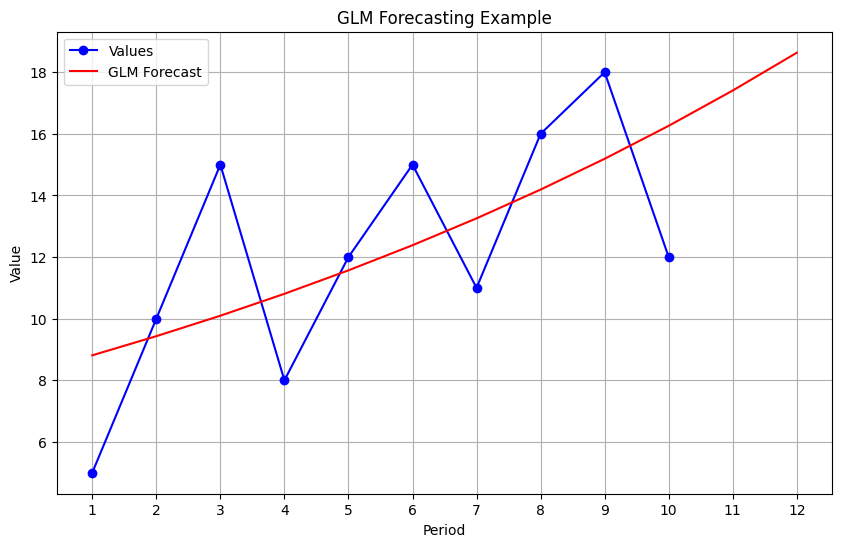

In [118]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Define GLM forecasting function
def GLM_forecast(ts, periods):
    # Fit GLM model
    X = np.arange(1, len(ts) + 1)
    X = sm.add_constant(X)  # Add intercept term
    model = sm.GLM(ts, X, family=sm.families.Poisson())
    result = model.fit()
    
    # Predict
    forecast = result.predict(sm.add_constant(np.arange(1, len(ts) + periods + 1)))
    
    return forecast

# Data
data = "1-5, 2-10, 3-15, 4-8, 5-12, 6-15, 7-11, 8-16, 9-18, 10-12"
values = np.array([int(pair.split('-')[1]) for pair in data.split(', ')])
periods = np.arange(1, len(values) + 1)

# GLM forecast
glm_forecast = GLM_forecast(values, 12)

# Plotting
plt.figure(figsize=(10, 6))

# Plot values in blue
plt.plot(periods, values, marker='o', linestyle='-', color='blue', label='Values')

# Plot GLM forecast in red
plt.plot(np.arange(1, 13), glm_forecast[:12], linestyle='-', color='red', label='GLM Forecast')

# Add labels and title
plt.xlabel('Period')
plt.ylabel('Value')
plt.title('GLM Forecasting Example')
plt.legend()

# Show all periods on the x-axis
plt.xticks(np.arange(1, 13))

# Show the plot
plt.grid(True)
plt.show()


## EXPERIMENTE

`Random Forest vs Croston`

C:\Users\salih\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\salih\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\salih\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\salih\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\salih\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X do

Croston RMSE: 28.29413227948413
Random Forest RMSE: 34.39680071143098
Croston MSE: 800.5579214489459
Random Forest MSE: 1183.1398991818985
Croston MAE: 20.558313038891615
Random Forest MAE: 21.827824026679945


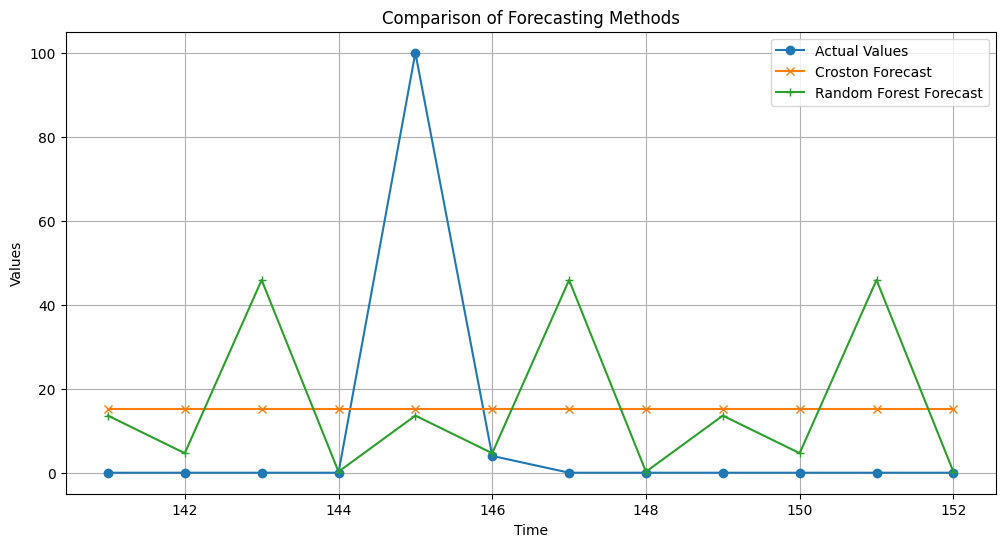

In [129]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

# Data
data = np.array([0, 1, 0, 3, 1, 6, 0, 2, 0, 0, 0, 12, 0, 2, 65, 0, 0, 1, 0, 0, 1, 0, 0, 0, 100, 4, 0, 8, 0, 0, 0, 0, 12, 16,
                 0, 0, 0, 24, 0, 4, 0, 100, 0, 0, 16, 0, 0, 0, 0, 0, 0, 0, 0, 0, 100, 100, 0, 0, 0, 0, 0, 300, 0, 0, 0, 0, 4,
                 0, 1, 0, 0, 0, 0, 0, 4, 180, 0, 0, 0, 0, 12, 0, 0, 0, 0, 0, 0, 0, 100, 6, 0, 0, 6, 116, 1, 0, 0, 0, 0, 100,
                 0, 0, 0, 0, 0, 0, 0, 100, 0, 0, 0, 0, 0, 100, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 200, 0, 0, 0, 0, 0, 0, 0,
                 0, 95, 0, 0, 0, 0, 0, 0, 0, 0, 0, 100, 4, 0, 0, 0, 0, 0, 0])

# Split data
train, test = data[:-12], data[-12:]

# Croston's Method Function
def croston_basic(ts, extra_periods=12, alpha=0.1):
    d = np.array(ts)
    cols = len(d)
    d = np.append(d, [np.nan] * extra_periods)
    a, p = [np.nan] * cols, [np.nan] * cols
    q = 1
    first_occurrence = np.argmax(d[:cols] > 0)
    a[first_occurrence] = d[first_occurrence]
    p[first_occurrence] = 1
    for t in range(first_occurrence + 1, cols):
        if d[t] > 0:
            a[t] = alpha * d[t] + (1 - alpha) * a[t - 1]
            p[t] = alpha * q + (1 - alpha) * p[t - 1]
            q = 1
        else:
            a[t] = a[t - 1]
            p[t] = p[t - 1]
            q += 1
    forecast = [a[-1]] * extra_periods
    forecast = np.array(forecast) / p[-1]
    return forecast


croston_forecast = croston_basic(train, extra_periods=12)
# Calculate error metrics for Croston method
croston_mse = mean_squared_error(test, croston_forecast)
croston_rmse = mean_squared_error(test, croston_forecast, squared=False)
croston_mae = mean_absolute_error(test, croston_forecast)

# Random Forest Model
def random_forest_forecast(train, test, lag=1):
    train_df = pd.DataFrame(train)
    for i in range(1, lag+1):
        train_df[f'lag_{i}'] = train_df[0].shift(i)
    train_df = train_df.dropna()
    X_train = train_df.drop(0, axis=1)
    y_train = train_df[0]
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    # Forecasting
    test_preds = [train[-1]]  # start with last point in the training set
    for i in range(len(test)):
        X_test = np.array([test_preds[-lag:]])
        pred = model.predict(X_test)
        test_preds.append(pred[0])
    return test_preds[1:]

# Random Forest Prediction and RMSE
random_forest_predictions = random_forest_forecast(train, test, lag=1)
random_forest_rmse = mean_squared_error(test, random_forest_predictions, squared=False)
random_forest_mse = mean_squared_error(test, random_forest_predictions)
random_forest_mae = mean_absolute_error(test, random_forest_predictions)

# Print Results
print("Croston RMSE:", croston_rmse)
print("Random Forest RMSE:", random_forest_rmse)
print("Croston MSE:", croston_mse)
print("Random Forest MSE:", random_forest_mse)
print("Croston MAE:", croston_mae)
print("Random Forest MAE:", random_forest_mae)

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(range(len(data)-12, len(data)), test, label='Actual Values', marker='o')
plt.plot(range(len(data)-12, len(data)), croston_forecast, label='Croston Forecast', marker='x')
plt.plot(range(len(data)-12, len(data)), random_forest_predictions, label='Random Forest Forecast', marker='+')
plt.title('Comparison of Forecasting Methods')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()


C:\Users\salih\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\salih\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\salih\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\salih\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\salih\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X do

Croston RMSE: 18.211373143900776
Random Forest RMSE: 18.23671601155467
Croston MSE: 331.6541117863904
Random Forest MSE: 332.5778108860945
Croston MAE: 13.843031666541568
Random Forest MAE: 12.186818401629553


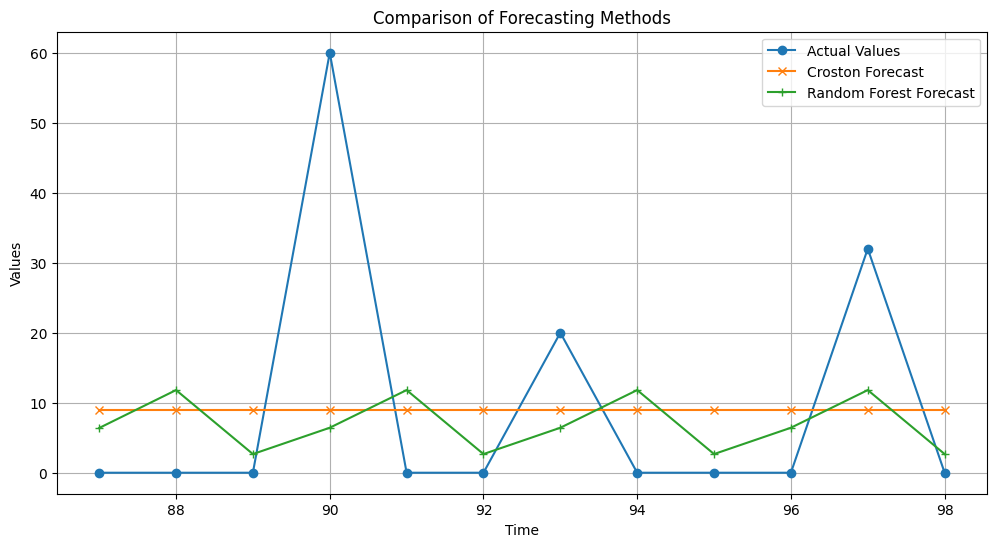

In [130]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

# Data
data = np.array([75, 0, 1, 0, 0, 0, 0, 0, 12, 0, 0, 0, 0, 0, 0, 8, 12, 0, 0, 0, 0, 0, 62, 1, 0, 1, 0, 5, 0, 0, 4, 16, 4, 13, 100, 0, 6, 13, 5, 10, 2, 0, 0, 0, 5, 16, 0, 0, 0, 0, 0, 0, 1, 18, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 40, 0, 0, 0, 10, 0, 0, 0, 0, 100, 0, 87, 0, 2, 12, 10, 0, 0, 12, 0, 0, 0, 0, 60, 0, 0, 20, 0, 0, 0, 32, 0])

# Split data
train, test = data[:-12], data[-12:]


croston_forecast = croston_basic(train, extra_periods=12)
# Calculate error metrics for Croston method
croston_mse = mean_squared_error(test, croston_forecast)
croston_rmse = mean_squared_error(test, croston_forecast, squared=False)
croston_mae = mean_absolute_error(test, croston_forecast)

# Random Forest Model
def random_forest_forecast(train, test, lag=1):
    train_df = pd.DataFrame(train)
    for i in range(1, lag+1):
        train_df[f'lag_{i}'] = train_df[0].shift(i)
    train_df = train_df.dropna()
    X_train = train_df.drop(0, axis=1)
    y_train = train_df[0]
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    # Forecasting
    test_preds = [train[-1]]  # start with last point in the training set
    for i in range(len(test)):
        X_test = np.array([test_preds[-lag:]])
        pred = model.predict(X_test)
        test_preds.append(pred[0])
    return test_preds[1:]

# Random Forest Prediction and RMSE
random_forest_predictions = random_forest_forecast(train, test, lag=1)
random_forest_rmse = mean_squared_error(test, random_forest_predictions, squared=False)
random_forest_mse = mean_squared_error(test, random_forest_predictions)
random_forest_mae = mean_absolute_error(test, random_forest_predictions)

# Print Results
print("Croston RMSE:", croston_rmse)
print("Random Forest RMSE:", random_forest_rmse)
print("Croston MSE:", croston_mse)
print("Random Forest MSE:", random_forest_mse)
print("Croston MAE:", croston_mae)
print("Random Forest MAE:", random_forest_mae)

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(range(len(data)-12, len(data)), test, label='Actual Values', marker='o')
plt.plot(range(len(data)-12, len(data)), croston_forecast, label='Croston Forecast', marker='x')
plt.plot(range(len(data)-12, len(data)), random_forest_predictions, label='Random Forest Forecast', marker='+')
plt.title('Comparison of Forecasting Methods')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()


C:\Users\salih\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\salih\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\salih\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\salih\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\salih\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X do

Croston RMSE: 5.447217399535875
Random Forest RMSE: 4.503213203391656
Croston MSE: 29.672177397806383
Random Forest MSE: 20.27892915520094
Croston MAE: 5.264224700511826
Random Forest MAE: 2.828005871976497


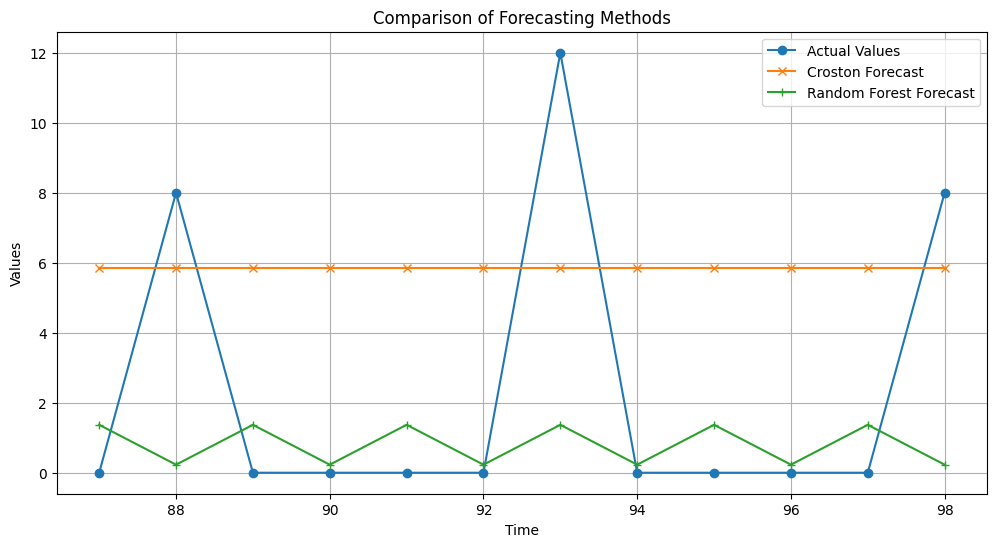

In [131]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

# Data
data = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 10, 0, 0, 12, 0, 0, 0, 0, 0, 0, 2, 0, 8, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 40, 10, 0, 38, 60, 0, 0, 0, 0, 8, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 12, 0, 0, 0, 0, 8])
# Split data
train, test = data[:-12], data[-12:]


croston_forecast = croston_basic(train, extra_periods=12)
# Calculate error metrics for Croston method
croston_mse = mean_squared_error(test, croston_forecast)
croston_rmse = mean_squared_error(test, croston_forecast, squared=False)
croston_mae = mean_absolute_error(test, croston_forecast)

# Random Forest Model
def random_forest_forecast(train, test, lag=1):
    train_df = pd.DataFrame(train)
    for i in range(1, lag+1):
        train_df[f'lag_{i}'] = train_df[0].shift(i)
    train_df = train_df.dropna()
    X_train = train_df.drop(0, axis=1)
    y_train = train_df[0]
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    # Forecasting
    test_preds = [train[-1]]  # start with last point in the training set
    for i in range(len(test)):
        X_test = np.array([test_preds[-lag:]])
        pred = model.predict(X_test)
        test_preds.append(pred[0])
    return test_preds[1:]

# Random Forest Prediction and RMSE
random_forest_predictions = random_forest_forecast(train, test, lag=1)
random_forest_rmse = mean_squared_error(test, random_forest_predictions, squared=False)
random_forest_mse = mean_squared_error(test, random_forest_predictions)
random_forest_mae = mean_absolute_error(test, random_forest_predictions)

# Print Results
print("Croston RMSE:", croston_rmse)
print("Random Forest RMSE:", random_forest_rmse)
print("Croston MSE:", croston_mse)
print("Random Forest MSE:", random_forest_mse)
print("Croston MAE:", croston_mae)
print("Random Forest MAE:", random_forest_mae)

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(range(len(data)-12, len(data)), test, label='Actual Values', marker='o')
plt.plot(range(len(data)-12, len(data)), croston_forecast, label='Croston Forecast', marker='x')
plt.plot(range(len(data)-12, len(data)), random_forest_predictions, label='Random Forest Forecast', marker='+')
plt.title('Comparison of Forecasting Methods')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()


C:\Users\salih\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\salih\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\salih\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\salih\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\salih\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X do

Croston RMSE: 15.20126082419483
Random Forest RMSE: 10.352207522154368
Croston MSE: 231.07833064520048
Random Forest MSE: 107.16820058174949
Croston MAE: 15.187549637072264
Random Forest MAE: 7.6349221698415555


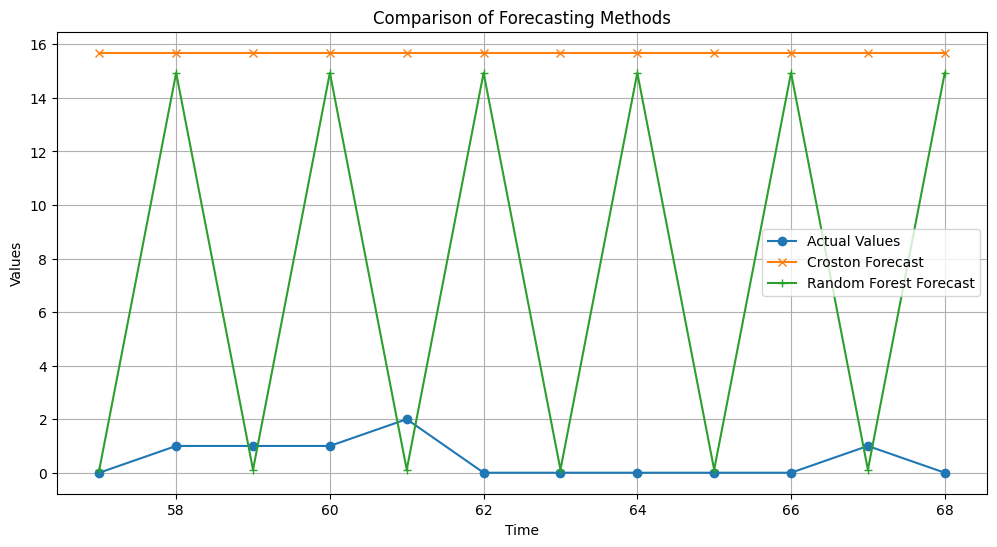

In [132]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Data
data = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 121, 1, 0, 500, 30, 0, 0, 1, 0, 1, 0, 1, 1, 1, 2, 0, 0, 0, 0, 0, 1, 0])

# Split data
train, test = data[:-12], data[-12:]

croston_forecast = croston_basic(train, extra_periods=12)
# Calculate error metrics for Croston method
croston_mse = mean_squared_error(test, croston_forecast)
croston_rmse = mean_squared_error(test, croston_forecast, squared=False)
croston_mae = mean_absolute_error(test, croston_forecast)

# Random Forest Model
def random_forest_forecast(train, test, lag=1):
    train_df = pd.DataFrame(train)
    for i in range(1, lag+1):
        train_df[f'lag_{i}'] = train_df[0].shift(i)
    train_df = train_df.dropna()
    X_train = train_df.drop(0, axis=1)
    y_train = train_df[0]
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    # Forecasting
    test_preds = [train[-1]]  # start with last point in the training set
    for i in range(len(test)):
        X_test = np.array([test_preds[-lag:]])
        pred = model.predict(X_test)
        test_preds.append(pred[0])
    return test_preds[1:]

# Random Forest Prediction and RMSE
random_forest_predictions = random_forest_forecast(train, test, lag=1)
random_forest_rmse = mean_squared_error(test, random_forest_predictions, squared=False)
random_forest_mse = mean_squared_error(test, random_forest_predictions)
random_forest_mae = mean_absolute_error(test, random_forest_predictions)

# Print Results
print("Croston RMSE:", croston_rmse)
print("Random Forest RMSE:", random_forest_rmse)
print("Croston MSE:", croston_mse)
print("Random Forest MSE:", random_forest_mse)
print("Croston MAE:", croston_mae)
print("Random Forest MAE:", random_forest_mae)

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(range(len(data)-12, len(data)), test, label='Actual Values', marker='o')
plt.plot(range(len(data)-12, len(data)), croston_forecast, label='Croston Forecast', marker='x')
plt.plot(range(len(data)-12, len(data)), random_forest_predictions, label='Random Forest Forecast', marker='+')
plt.title('Comparison of Forecasting Methods')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()


`LSTM vs Croston`

C:\Users\salih\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\salih\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


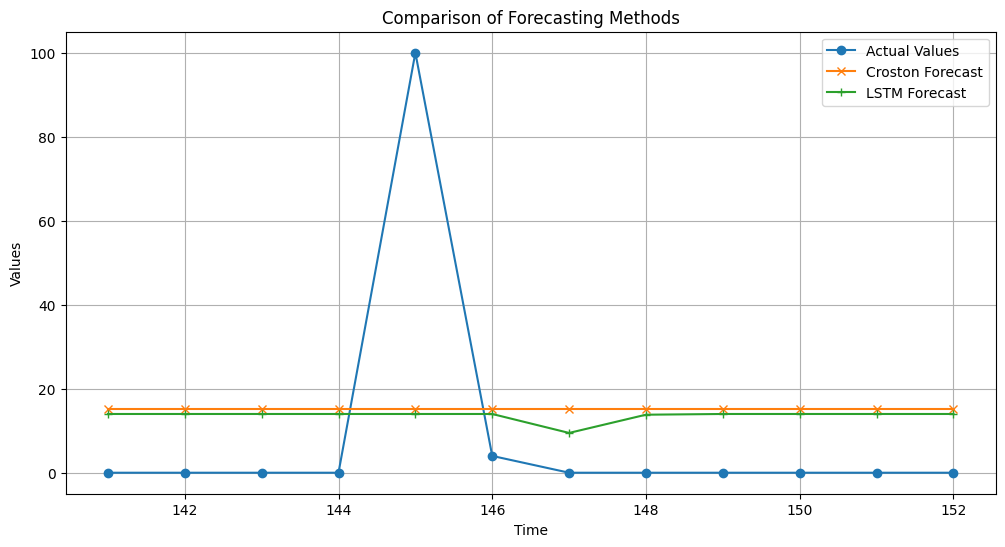

Croston RMSE: 28.29413227948413
LSTM RMSE: 27.90377329550042
Croston MSE: 800.5579214489459
LSTM MSE: 778.6205641266824
Croston MAE: 20.558313038891615
LSTM MAE: 19.26358191172282


In [133]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Data
data = np.array([0, 1, 0, 3, 1, 6, 0, 2, 0, 0, 0, 12, 0, 2, 65, 0, 0, 1, 0, 0, 1, 0, 0, 0, 100, 4, 0, 8, 0, 0, 0, 0, 12, 16,
                 0, 0, 0, 24, 0, 4, 0, 100, 0, 0, 16, 0, 0, 0, 0, 0, 0, 0, 0, 0, 100, 100, 0, 0, 0, 0, 0, 300, 0, 0, 0, 0, 4,
                 0, 1, 0, 0, 0, 0, 0, 4, 180, 0, 0, 0, 0, 12, 0, 0, 0, 0, 0, 0, 0, 100, 6, 0, 0, 6, 116, 1, 0, 0, 0, 0, 100,
                 0, 0, 0, 0, 0, 0, 0, 100, 0, 0, 0, 0, 0, 100, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 200, 0, 0, 0, 0, 0, 0, 0,
                 0, 95, 0, 0, 0, 0, 0, 0, 0, 0, 0, 100, 4, 0, 0, 0, 0, 0, 0])
train, test = data[:-12], data[-12:]

croston_forecast = croston_basic(train, extra_periods=12)
# Calculate error metrics for Croston method
croston_mse = mean_squared_error(test, croston_forecast)
croston_rmse = mean_squared_error(test, croston_forecast, squared=False)
croston_mae = mean_absolute_error(test, croston_forecast)


# LSTM Forecasting
data = data.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

look_back = 1
X, y = create_dataset(data_scaled, look_back)
X = np.reshape(X, (X.shape[0], 1, X.shape[1]))
X_train, X_test = X[:-12], X[-12:]
y_train, y_test = y[:-12], y[-12:]

model = Sequential()
model.add(LSTM(50, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=0)

train_predict = model.predict(X_train)
test_predict = model.predict(X_test)
test_predict = scaler.inverse_transform(test_predict)

lstm_rmse = np.sqrt(mean_squared_error(test, test_predict[:,0]))
lstm_mse = mean_squared_error(test, test_predict[:,0])
lstm_mae = mean_absolute_error(test, test_predict[:,0])

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(range(len(data)-12, len(data)), test, label='Actual Values', marker='o')
plt.plot(range(len(data)-12, len(data)), croston_forecast, label='Croston Forecast', marker='x')
plt.plot(range(len(data)-12, len(data)), test_predict[:,0], label='LSTM Forecast', marker='+')
plt.title('Comparison of Forecasting Methods')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()


# Print error metrics
print("Croston RMSE:", croston_rmse)
print("LSTM RMSE:", lstm_rmse)
print("Croston MSE:", croston_mse)
print("LSTM MSE:", lstm_mse)
print("Croston MAE:", croston_mae)
print("LSTM MAE:", lstm_mae)


C:\Users\salih\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\salih\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


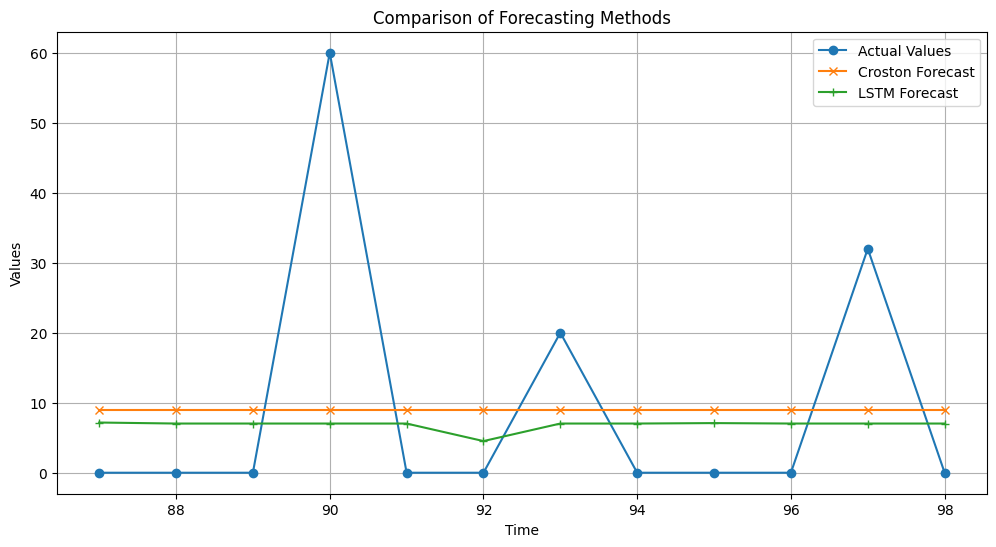

Croston RMSE: 18.211373143900776
LSTM RMSE: 18.29511124397754
Croston MSE: 331.6541117863904
LSTM MSE: 334.7110954295135
Croston MAE: 13.843031666541568
LSTM MAE: 12.654949386914572


In [134]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Data
data = np.array([75, 0, 1, 0, 0, 0, 0, 0, 12, 0, 0, 0, 0, 0, 0, 8, 12, 0, 0, 0, 0, 0, 62, 1, 0, 1, 0, 5, 0, 0, 4, 16, 4, 13, 100, 0, 6, 13, 5, 10, 2, 0, 0, 0, 5, 16, 0, 0, 0, 0, 0, 0, 1, 18, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 40, 0, 0, 0, 10, 0, 0, 0, 0, 100, 0, 87, 0, 2, 12, 10, 0, 0, 12, 0, 0, 0, 0, 60, 0, 0, 20, 0, 0, 0, 32, 0])
train, test = data[:-12], data[-12:]

croston_forecast = croston_basic(train, extra_periods=12)
# Calculate error metrics for Croston method
croston_mse = mean_squared_error(test, croston_forecast)
croston_rmse = mean_squared_error(test, croston_forecast, squared=False)
croston_mae = mean_absolute_error(test, croston_forecast)


# LSTM Forecasting
data = data.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

look_back = 1
X, y = create_dataset(data_scaled, look_back)
X = np.reshape(X, (X.shape[0], 1, X.shape[1]))
X_train, X_test = X[:-12], X[-12:]
y_train, y_test = y[:-12], y[-12:]

model = Sequential()
model.add(LSTM(50, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=0)

train_predict = model.predict(X_train)
test_predict = model.predict(X_test)
test_predict = scaler.inverse_transform(test_predict)

lstm_rmse = np.sqrt(mean_squared_error(test, test_predict[:,0]))
lstm_mse = mean_squared_error(test, test_predict[:,0])
lstm_mae = mean_absolute_error(test, test_predict[:,0])

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(range(len(data)-12, len(data)), test, label='Actual Values', marker='o')
plt.plot(range(len(data)-12, len(data)), croston_forecast, label='Croston Forecast', marker='x')
plt.plot(range(len(data)-12, len(data)), test_predict[:,0], label='LSTM Forecast', marker='+')
plt.title('Comparison of Forecasting Methods')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()


# Print error metrics
print("Croston RMSE:", croston_rmse)
print("LSTM RMSE:", lstm_rmse)
print("Croston MSE:", croston_mse)
print("LSTM MSE:", lstm_mse)
print("Croston MAE:", croston_mae)
print("LSTM MAE:", lstm_mae)

C:\Users\salih\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\salih\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


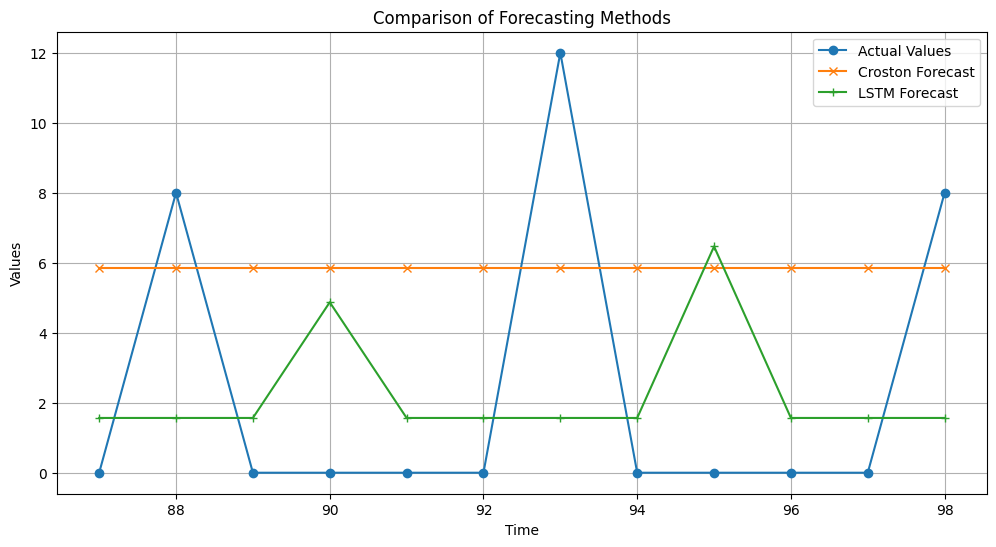

Croston RMSE: 5.447217399535875
LSTM RMSE: 4.78176998647671
Croston MSE: 29.672177397806383
LSTM MSE: 22.865324203569475
Croston MAE: 5.264224700511826
LSTM MAE: 3.7996994256973267


In [135]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Data
data = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 10, 0, 0, 12, 0, 0, 0, 0, 0, 0, 2, 0, 8, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 40, 10, 0, 38, 60, 0, 0, 0, 0, 8, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 12, 0, 0, 0, 0, 8])
train, test = data[:-12], data[-12:]

croston_forecast = croston_basic(train, extra_periods=12)
# Calculate error metrics for Croston method
croston_mse = mean_squared_error(test, croston_forecast)
croston_rmse = mean_squared_error(test, croston_forecast, squared=False)
croston_mae = mean_absolute_error(test, croston_forecast)


# LSTM Forecasting
data = data.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

look_back = 1
X, y = create_dataset(data_scaled, look_back)
X = np.reshape(X, (X.shape[0], 1, X.shape[1]))
X_train, X_test = X[:-12], X[-12:]
y_train, y_test = y[:-12], y[-12:]

model = Sequential()
model.add(LSTM(50, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=0)

train_predict = model.predict(X_train)
test_predict = model.predict(X_test)
test_predict = scaler.inverse_transform(test_predict)

lstm_rmse = np.sqrt(mean_squared_error(test, test_predict[:,0]))
lstm_mse = mean_squared_error(test, test_predict[:,0])
lstm_mae = mean_absolute_error(test, test_predict[:,0])

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(range(len(data)-12, len(data)), test, label='Actual Values', marker='o')
plt.plot(range(len(data)-12, len(data)), croston_forecast, label='Croston Forecast', marker='x')
plt.plot(range(len(data)-12, len(data)), test_predict[:,0], label='LSTM Forecast', marker='+')
plt.title('Comparison of Forecasting Methods')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()


# Print error metrics
print("Croston RMSE:", croston_rmse)
print("LSTM RMSE:", lstm_rmse)
print("Croston MSE:", croston_mse)
print("LSTM MSE:", lstm_mse)
print("Croston MAE:", croston_mae)
print("LSTM MAE:", lstm_mae)


C:\Users\salih\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\salih\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 422ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


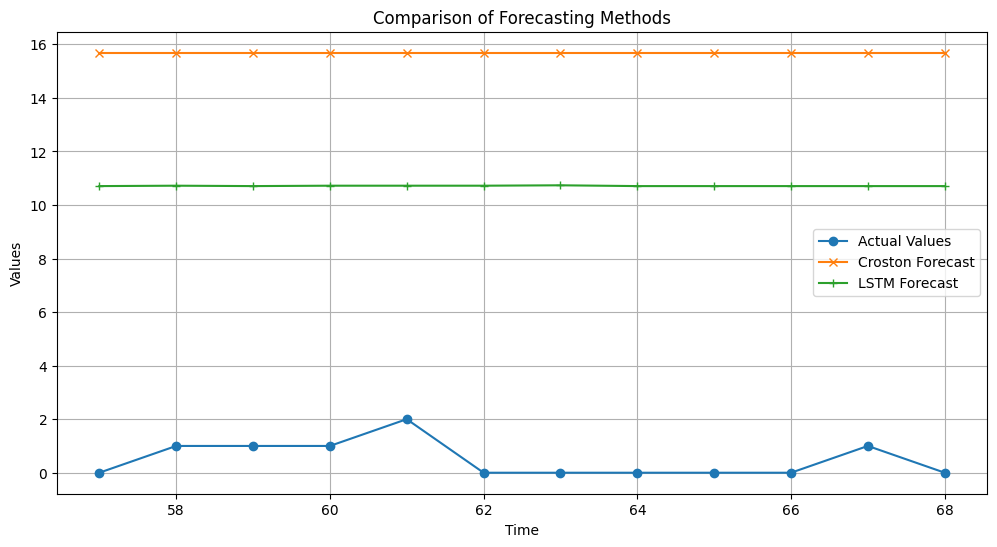

Croston RMSE: 15.20126082419483
LSTM RMSE: 10.233594946867345
Croston MSE: 231.07833064520048
LSTM MSE: 104.72646553654886
Croston MAE: 15.187549637072264
LSTM MAE: 10.213332494099935


In [136]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Data
data = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 121, 1, 0, 500, 30, 0, 0, 1, 0, 1, 0, 1, 1, 1, 2, 0, 0, 0, 0, 0, 1, 0])
train, test = data[:-12], data[-12:]

croston_forecast = croston_basic(train, extra_periods=12)
# Calculate error metrics for Croston method
croston_mse = mean_squared_error(test, croston_forecast)
croston_rmse = mean_squared_error(test, croston_forecast, squared=False)
croston_mae = mean_absolute_error(test, croston_forecast)


# LSTM Forecasting
data = data.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

look_back = 1
X, y = create_dataset(data_scaled, look_back)
X = np.reshape(X, (X.shape[0], 1, X.shape[1]))
X_train, X_test = X[:-12], X[-12:]
y_train, y_test = y[:-12], y[-12:]

model = Sequential()
model.add(LSTM(50, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=0)

train_predict = model.predict(X_train)
test_predict = model.predict(X_test)
test_predict = scaler.inverse_transform(test_predict)

lstm_rmse = np.sqrt(mean_squared_error(test, test_predict[:,0]))
lstm_mse = mean_squared_error(test, test_predict[:,0])
lstm_mae = mean_absolute_error(test, test_predict[:,0])

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(range(len(data)-12, len(data)), test, label='Actual Values', marker='o')
plt.plot(range(len(data)-12, len(data)), croston_forecast, label='Croston Forecast', marker='x')
plt.plot(range(len(data)-12, len(data)), test_predict[:,0], label='LSTM Forecast', marker='+')
plt.title('Comparison of Forecasting Methods')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()


# Print error metrics
print("Croston RMSE:", croston_rmse)
print("LSTM RMSE:", lstm_rmse)
print("Croston MSE:", croston_mse)
print("LSTM MSE:", lstm_mse)
print("Croston MAE:", croston_mae)
print("LSTM MAE:", lstm_mae)


`KNN vs Croston`

C:\Users\salih\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\salih\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
C:\Users\salih\AppData\Local\Temp\ipykernel_3152\1436251955.py:41: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  last_values[0, -1] = pred
C:\Users\salih\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.

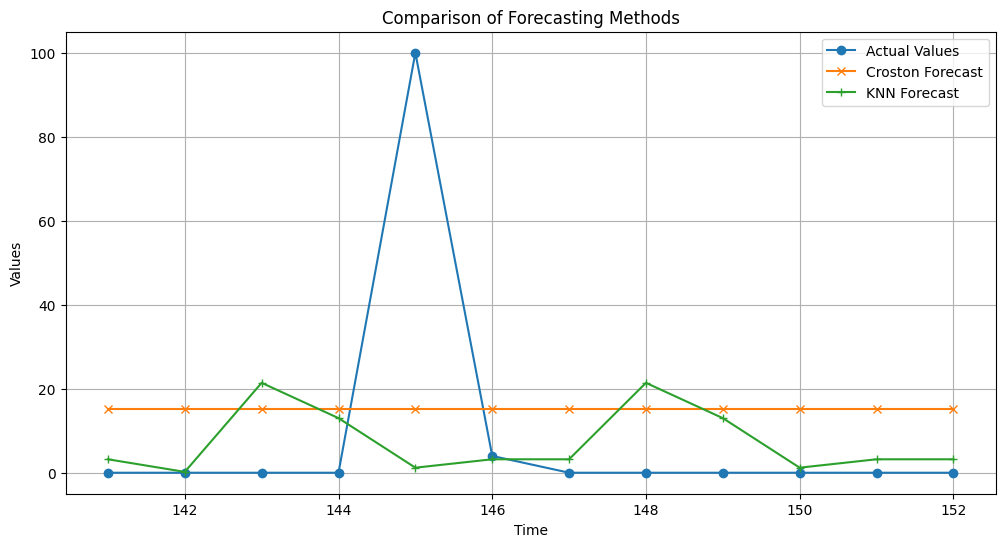

Croston RMSE: 28.29413227948413
KNN RMSE: 27.63361713296297
Croston MSE: 800.5579214489459
KNN MSE: 763.6167958511847
Croston MAE: 20.558313038891615
KNN MAE: 16.926549275716145


In [137]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt

# Data
data = np.array([0, 1, 0, 3, 1, 6, 0, 2, 0, 0, 0, 12, 0, 2, 65, 0, 0, 1, 0, 0, 1, 0, 0, 0, 100, 4, 0, 8, 0, 0, 0, 0, 12, 16,
                 0, 0, 0, 24, 0, 4, 0, 100, 0, 0, 16, 0, 0, 0, 0, 0, 0, 0, 0, 0, 100, 100, 0, 0, 0, 0, 0, 300, 0, 0, 0, 0, 4,
                 0, 1, 0, 0, 0, 0, 0, 4, 180, 0, 0, 0, 0, 12, 0, 0, 0, 0, 0, 0, 0, 100, 6, 0, 0, 6, 116, 1, 0, 0, 0, 0, 100,
                 0, 0, 0, 0, 0, 0, 0, 100, 0, 0, 0, 0, 0, 100, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 200, 0, 0, 0, 0, 0, 0, 0,
                 0, 95, 0, 0, 0, 0, 0, 0, 0, 0, 0, 100, 4, 0, 0, 0, 0, 0, 0])
train, test = data[:-12], data[-12:]

croston_forecast = croston_basic(train, extra_periods=12)
# Calculate error metrics for Croston method
croston_mse = mean_squared_error(test, croston_forecast)
croston_rmse = mean_squared_error(test, croston_forecast, squared=False)
croston_mae = mean_absolute_error(test, croston_forecast)

# KNN Forecasting
train_data = pd.DataFrame(train)
for i in range(1, 4):  # We use a lag of 3 for KNN
    train_data['lag_' + str(i)] = train_data[0].shift(i)
train_data = train_data.dropna()  # Drop rows with NaN values which are the first 3 rows

X_train = train_data.drop(0, axis=1)
y_train = train_data[0]
model = KNeighborsRegressor(n_neighbors=5)
model.fit(X_train, y_train)

# To forecast, we need the last 3 known values
last_values = train_data.iloc[-1, 1:].values.reshape(1, -1)
test_preds = []
for i in range(12):
    pred = model.predict(last_values)
    test_preds.append(pred[0])
    # Update last_values for the next step
    last_values = np.roll(last_values, -1)
    last_values[0, -1] = pred

knn_rmse = np.sqrt(mean_squared_error(test, test_predict[:,0]))
knn_mse = mean_squared_error(test, test_predict[:,0])
knn_mae = mean_absolute_error(test, test_predict[:,0])

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(range(len(data)-12, len(data)), test, label='Actual Values', marker='o')
plt.plot(range(len(data)-12, len(data)), croston_forecast, label='Croston Forecast', marker='x')
plt.plot(range(len(data)-12, len(data)), test_preds, label='KNN Forecast', marker='+')
plt.title('Comparison of Forecasting Methods')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

# Print error metrics
print("Croston RMSE:", croston_rmse)
print("KNN RMSE:", knn_rmse)
print("Croston MSE:", croston_mse)
print("KNN MSE:", knn_mse)
print("Croston MAE:", croston_mae)
print("KNN MAE:", knn_mae)



C:\Users\salih\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\salih\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
C:\Users\salih\AppData\Local\Temp\ipykernel_3152\2232765530.py:37: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  last_values[0, -1] = pred
C:\Users\salih\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.

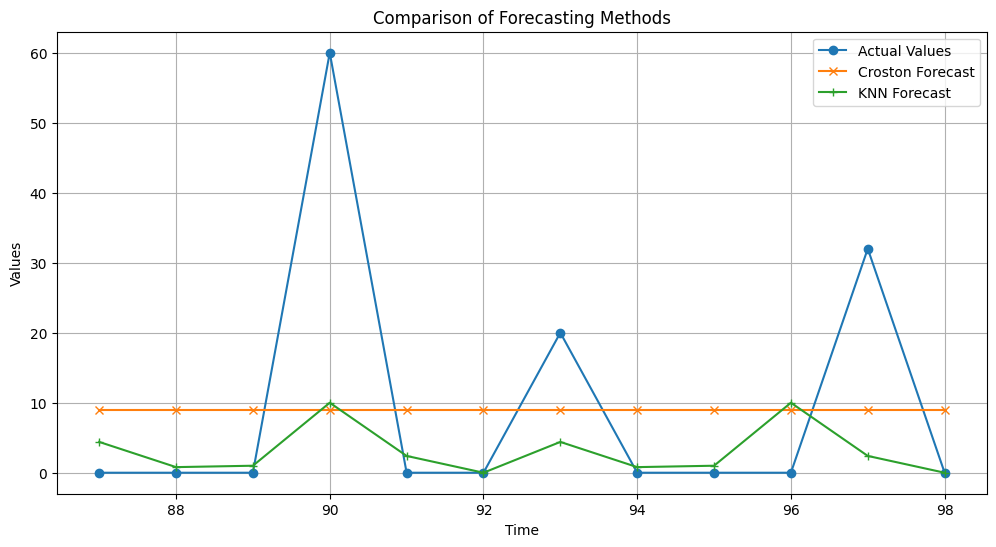

Croston RMSE: 18.211373143900776
KNN RMSE: 18.25792516770717
Croston MSE: 331.6541117863904
KNN MSE: 333.35183142959494
Croston MAE: 13.843031666541568
KNN MAE: 14.686306953430176


In [138]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt

# Data
data = np.array([75, 0, 1, 0, 0, 0, 0, 0, 12, 0, 0, 0, 0, 0, 0, 8, 12, 0, 0, 0, 0, 0, 62, 1, 0, 1, 0, 5, 0, 0, 4, 16, 4, 13, 100, 0, 6, 13, 5, 10, 2, 0, 0, 0, 5, 16, 0, 0, 0, 0, 0, 0, 1, 18, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 40, 0, 0, 0, 10, 0, 0, 0, 0, 100, 0, 87, 0, 2, 12, 10, 0, 0, 12, 0, 0, 0, 0, 60, 0, 0, 20, 0, 0, 0, 32, 0])
train, test = data[:-12], data[-12:]

croston_forecast = croston_basic(train, extra_periods=12)
# Calculate error metrics for Croston method
croston_mse = mean_squared_error(test, croston_forecast)
croston_rmse = mean_squared_error(test, croston_forecast, squared=False)
croston_mae = mean_absolute_error(test, croston_forecast)

# KNN Forecasting
train_data = pd.DataFrame(train)
for i in range(1, 4):  # We use a lag of 3 for KNN
    train_data['lag_' + str(i)] = train_data[0].shift(i)
train_data = train_data.dropna()  # Drop rows with NaN values which are the first 3 rows

X_train = train_data.drop(0, axis=1)
y_train = train_data[0]
model = KNeighborsRegressor(n_neighbors=5)
model.fit(X_train, y_train)

# To forecast, we need the last 3 known values
last_values = train_data.iloc[-1, 1:].values.reshape(1, -1)
test_preds = []
for i in range(12):
    pred = model.predict(last_values)
    test_preds.append(pred[0])
    # Update last_values for the next step
    last_values = np.roll(last_values, -1)
    last_values[0, -1] = pred

knn_rmse = np.sqrt(mean_squared_error(test, test_predict[:,0]))
knn_mse = mean_squared_error(test, test_predict[:,0])
knn_mae = mean_absolute_error(test, test_predict[:,0])

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(range(len(data)-12, len(data)), test, label='Actual Values', marker='o')
plt.plot(range(len(data)-12, len(data)), croston_forecast, label='Croston Forecast', marker='x')
plt.plot(range(len(data)-12, len(data)), test_preds, label='KNN Forecast', marker='+')
plt.title('Comparison of Forecasting Methods')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

# Print error metrics
print("Croston RMSE:", croston_rmse)
print("KNN RMSE:", knn_rmse)
print("Croston MSE:", croston_mse)
print("KNN MSE:", knn_mse)
print("Croston MAE:", croston_mae)
print("KNN MAE:", knn_mae)



C:\Users\salih\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\salih\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
C:\Users\salih\AppData\Local\Temp\ipykernel_3152\1046309476.py:37: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  last_values[0, -1] = pred
C:\Users\salih\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.

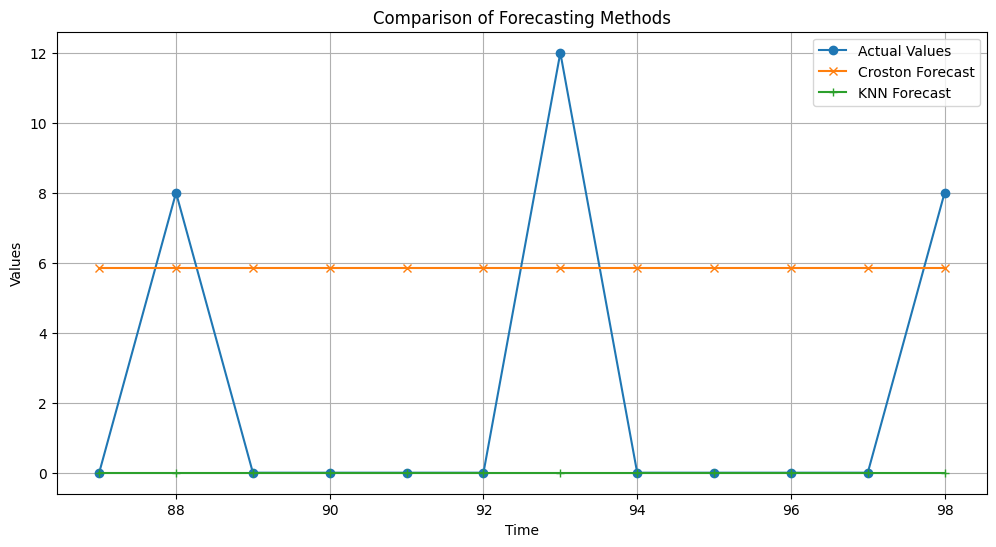

Croston RMSE: 5.447217399535875
KNN RMSE: 9.348924069358327
Croston MSE: 29.672177397806383
KNN MSE: 87.40238125462747
Croston MAE: 5.264224700511826
KNN MAE: 8.590749581654867


In [139]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt

# Data
data = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 10, 0, 0, 12, 0, 0, 0, 0, 0, 0, 2, 0, 8, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 40, 10, 0, 38, 60, 0, 0, 0, 0, 8, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 12, 0, 0, 0, 0, 8])
train, test = data[:-12], data[-12:]

croston_forecast = croston_basic(train, extra_periods=12)
# Calculate error metrics for Croston method
croston_mse = mean_squared_error(test, croston_forecast)
croston_rmse = mean_squared_error(test, croston_forecast, squared=False)
croston_mae = mean_absolute_error(test, croston_forecast)

# KNN Forecasting
train_data = pd.DataFrame(train)
for i in range(1, 4):  # We use a lag of 3 for KNN
    train_data['lag_' + str(i)] = train_data[0].shift(i)
train_data = train_data.dropna()  # Drop rows with NaN values which are the first 3 rows

X_train = train_data.drop(0, axis=1)
y_train = train_data[0]
model = KNeighborsRegressor(n_neighbors=5)
model.fit(X_train, y_train)

# To forecast, we need the last 3 known values
last_values = train_data.iloc[-1, 1:].values.reshape(1, -1)
test_preds = []
for i in range(12):
    pred = model.predict(last_values)
    test_preds.append(pred[0])
    # Update last_values for the next step
    last_values = np.roll(last_values, -1)
    last_values[0, -1] = pred

knn_rmse = np.sqrt(mean_squared_error(test, test_predict[:,0]))
knn_mse = mean_squared_error(test, test_predict[:,0])
knn_mae = mean_absolute_error(test, test_predict[:,0])

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(range(len(data)-12, len(data)), test, label='Actual Values', marker='o')
plt.plot(range(len(data)-12, len(data)), croston_forecast, label='Croston Forecast', marker='x')
plt.plot(range(len(data)-12, len(data)), test_preds, label='KNN Forecast', marker='+')
plt.title('Comparison of Forecasting Methods')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

# Print error metrics
print("Croston RMSE:", croston_rmse)
print("KNN RMSE:", knn_rmse)
print("Croston MSE:", croston_mse)
print("KNN MSE:", knn_mse)
print("Croston MAE:", croston_mae)
print("KNN MAE:", knn_mae)



C:\Users\salih\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\salih\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
C:\Users\salih\AppData\Local\Temp\ipykernel_3152\743529341.py:37: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  last_values[0, -1] = pred
C:\Users\salih\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.w

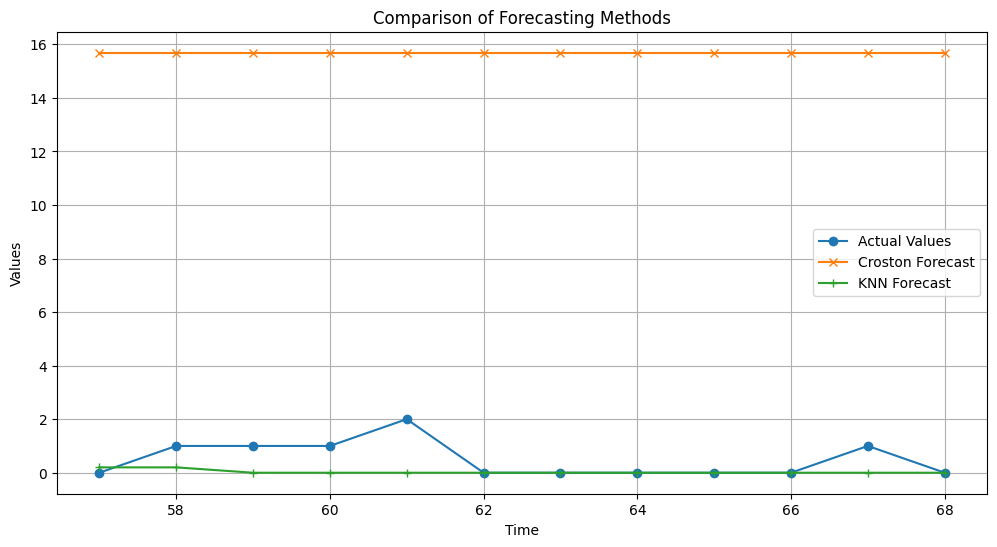

Croston RMSE: 15.20126082419483
KNN RMSE: 10.233594946867345
Croston MSE: 231.07833064520048
KNN MSE: 104.72646553654886
Croston MAE: 15.187549637072264
KNN MAE: 10.213332494099935


In [140]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt

# Data
data = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 121, 1, 0, 500, 30, 0, 0, 1, 0, 1, 0, 1, 1, 1, 2, 0, 0, 0, 0, 0, 1, 0])
train, test = data[:-12], data[-12:]

croston_forecast = croston_basic(train, extra_periods=12)
# Calculate error metrics for Croston method
croston_mse = mean_squared_error(test, croston_forecast)
croston_rmse = mean_squared_error(test, croston_forecast, squared=False)
croston_mae = mean_absolute_error(test, croston_forecast)

# KNN Forecasting
train_data = pd.DataFrame(train)
for i in range(1, 4):  # We use a lag of 3 for KNN
    train_data['lag_' + str(i)] = train_data[0].shift(i)
train_data = train_data.dropna()  # Drop rows with NaN values which are the first 3 rows

X_train = train_data.drop(0, axis=1)
y_train = train_data[0]
model = KNeighborsRegressor(n_neighbors=5)
model.fit(X_train, y_train)

# To forecast, we need the last 3 known values
last_values = train_data.iloc[-1, 1:].values.reshape(1, -1)
test_preds = []
for i in range(12):
    pred = model.predict(last_values)
    test_preds.append(pred[0])
    # Update last_values for the next step
    last_values = np.roll(last_values, -1)
    last_values[0, -1] = pred

knn_rmse = np.sqrt(mean_squared_error(test, test_predict[:,0]))
knn_mse = mean_squared_error(test, test_predict[:,0])
knn_mae = mean_absolute_error(test, test_predict[:,0])

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(range(len(data)-12, len(data)), test, label='Actual Values', marker='o')
plt.plot(range(len(data)-12, len(data)), croston_forecast, label='Croston Forecast', marker='x')
plt.plot(range(len(data)-12, len(data)), test_preds, label='KNN Forecast', marker='+')
plt.title('Comparison of Forecasting Methods')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

# Print error metrics
print("Croston RMSE:", croston_rmse)
print("KNN RMSE:", knn_rmse)
print("Croston MSE:", croston_mse)
print("KNN MSE:", knn_mse)
print("Croston MAE:", croston_mae)
print("KNN MAE:", knn_mae)


`ANN vs Croston`

C:\Users\salih\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\salih\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


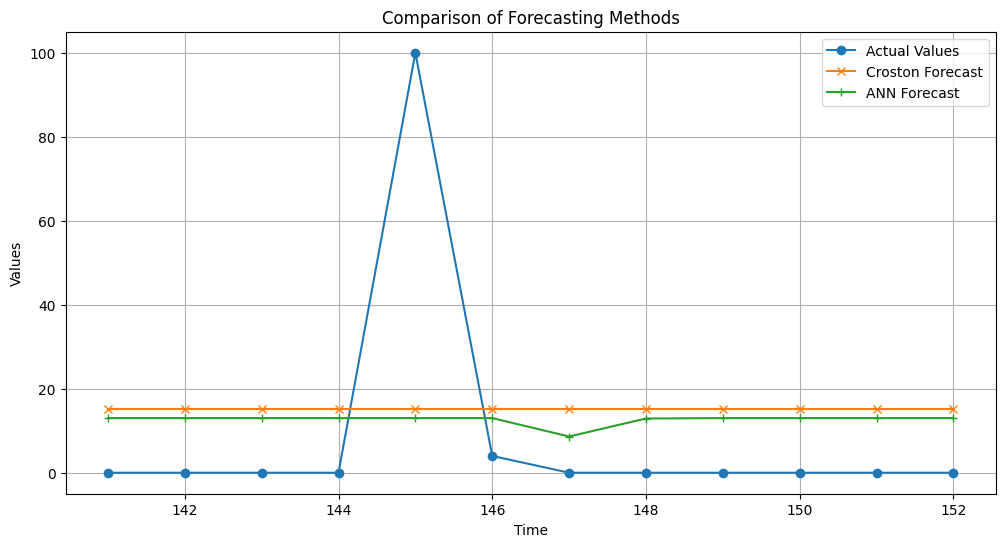

Croston RMSE: 28.29413227948413
ANN RMSE: 27.754329247804048
Croston MSE: 800.5579214489459
ANN MSE: 770.3027919955111
Croston MAE: 20.558313038891615
ANN MAE: 18.469411452611286


In [141]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt


# Data
data = np.array([0, 1, 0, 3, 1, 6, 0, 2, 0, 0, 0, 12, 0, 2, 65, 0, 0, 1, 0, 0, 1, 0, 0, 0, 100, 4, 0, 8, 0, 0, 0, 0, 12, 16, 0, 0, 0, 24, 0, 4, 0, 100, 0, 0, 16, 0, 0, 0, 0, 0, 0, 0, 0, 0, 100, 100, 0, 0, 0, 0, 0, 300, 0, 0, 0, 0, 4, 0, 1, 0, 0, 0, 0, 0, 4, 180, 0, 0, 0, 0, 12, 0, 0, 0, 0, 0, 0, 0, 100, 6, 0, 0, 6, 116, 1, 0, 0, 0, 0, 100, 0, 0, 0, 0, 0, 0, 0, 100, 0, 0, 0, 0, 0, 100, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 200, 0, 0, 0, 0, 0, 0, 0, 0, 95, 0, 0, 0, 0, 0, 0, 0, 0, 0, 100, 4, 0, 0, 0, 0, 0, 0])
train, test = data[:-12], data[-12:]


croston_forecast = croston_basic(train, extra_periods=12)
# Calculate error metrics for Croston method
croston_mse = mean_squared_error(test, croston_forecast)
croston_rmse = mean_squared_error(test, croston_forecast, squared=False)
croston_mae = mean_absolute_error(test, croston_forecast)

# ANN Forecasting
data = data.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

look_back = 1
X, y = create_dataset(data_scaled, look_back)
X_train, X_test = X[:-12], X[-12:]
y_train, y_test = y[:-12], y[-12:]

model = Sequential()
model.add(Dense(50, input_shape=(look_back,), activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=0)

train_predict = model.predict(X_train)
test_predict = model.predict(X_test)
test_predict = scaler.inverse_transform(test_predict)

ann_rmse = np.sqrt(mean_squared_error(test, test_predict[:,0]))
ann_mse = mean_squared_error(test, test_predict[:,0])
ann_mae = mean_absolute_error(test, test_predict[:,0])

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(range(len(data)-12, len(data)), test, label='Actual Values', marker='o')
plt.plot(range(len(data)-12, len(data)), croston_forecast, label='Croston Forecast', marker='x')
plt.plot(range(len(data)-12, len(data)), test_predict[:,0], label='ANN Forecast', marker='+')
plt.title('Comparison of Forecasting Methods')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

# Print error metrics
print("Croston RMSE:", croston_rmse)
print("ANN RMSE:", ann_rmse)
print("Croston MSE:", croston_mse)
print("ANN MSE:", ann_mse)
print("Croston MAE:", croston_mae)
print("ANN MAE:", ann_mae)


C:\Users\salih\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\salih\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


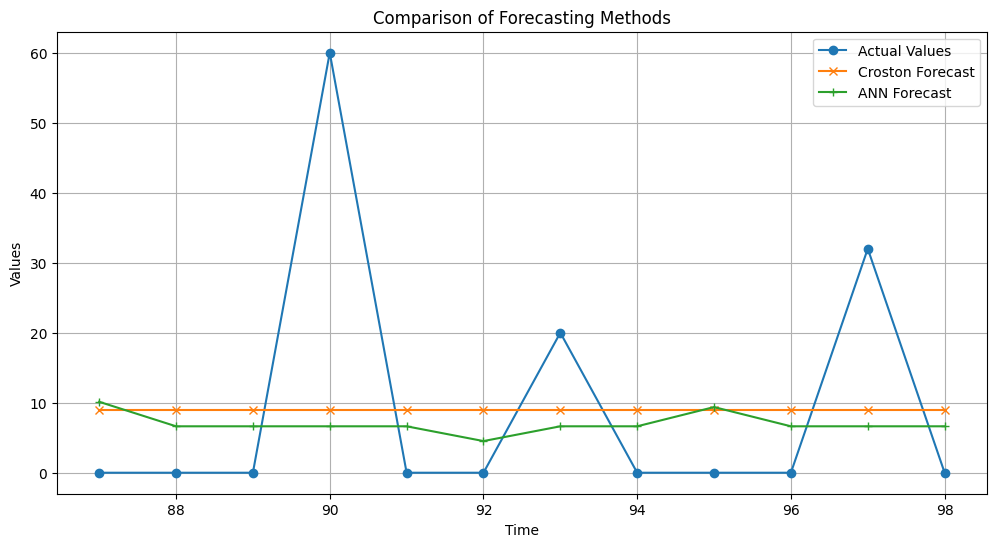

Croston RMSE: 18.211373143900776
ANN RMSE: 18.586227560020387
Croston MSE: 331.6541117863904
ANN MSE: 345.44785491286143
Croston MAE: 13.843031666541568
ANN MAE: 12.99390721321106


In [142]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

# Assuming 'data' has been defined elsewhere in the script, as provided in your previous message.
data = np.array([75, 0, 1, 0, 0, 0, 0, 0, 12, 0, 0, 0, 0, 0, 0, 8, 12, 0, 0, 0, 0, 0, 62, 1, 0, 1, 0, 5, 0, 0, 4, 16, 4, 13, 100, 0, 6, 13, 5, 10, 2, 0, 0, 0, 5, 16, 0, 0, 0, 0, 0, 0, 1, 18, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 40, 0, 0, 0, 10, 0, 0, 0, 0, 100, 0, 87, 0, 2, 12, 10, 0, 0, 12, 0, 0, 0, 0, 60, 0, 0, 20, 0, 0, 0, 32, 0])
train, test = data[:-12], data[-12:]

croston_forecast = croston_basic(train, extra_periods=12)
# Calculate error metrics for Croston method
croston_mse = mean_squared_error(test, croston_forecast)
croston_rmse = mean_squared_error(test, croston_forecast, squared=False)
croston_mae = mean_absolute_error(test, croston_forecast)

# ANN Forecasting
data = data.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

look_back = 1
X, y = create_dataset(data_scaled, look_back)
X_train, X_test = X[:-12], X[-12:]
y_train, y_test = y[:-12], y[-12:]

model = Sequential()
model.add(Dense(50, input_shape=(look_back,), activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=0)

train_predict = model.predict(X_train)
test_predict = model.predict(X_test)
test_predict = scaler.inverse_transform(test_predict)

ann_rmse = np.sqrt(mean_squared_error(test, test_predict[:,0]))
ann_mse = mean_squared_error(test, test_predict[:,0])
ann_mae = mean_absolute_error(test, test_predict[:,0])

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(range(len(data)-12, len(data)), test, label='Actual Values', marker='o')
plt.plot(range(len(data)-12, len(data)), croston_forecast, label='Croston Forecast', marker='x')
plt.plot(range(len(data)-12, len(data)), test_predict[:,0], label='ANN Forecast', marker='+')
plt.title('Comparison of Forecasting Methods')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

# Print error metrics
print("Croston RMSE:", croston_rmse)
print("ANN RMSE:", ann_rmse)
print("Croston MSE:", croston_mse)
print("ANN MSE:", ann_mse)
print("Croston MAE:", croston_mae)
print("ANN MAE:", ann_mae)


C:\Users\salih\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\salih\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


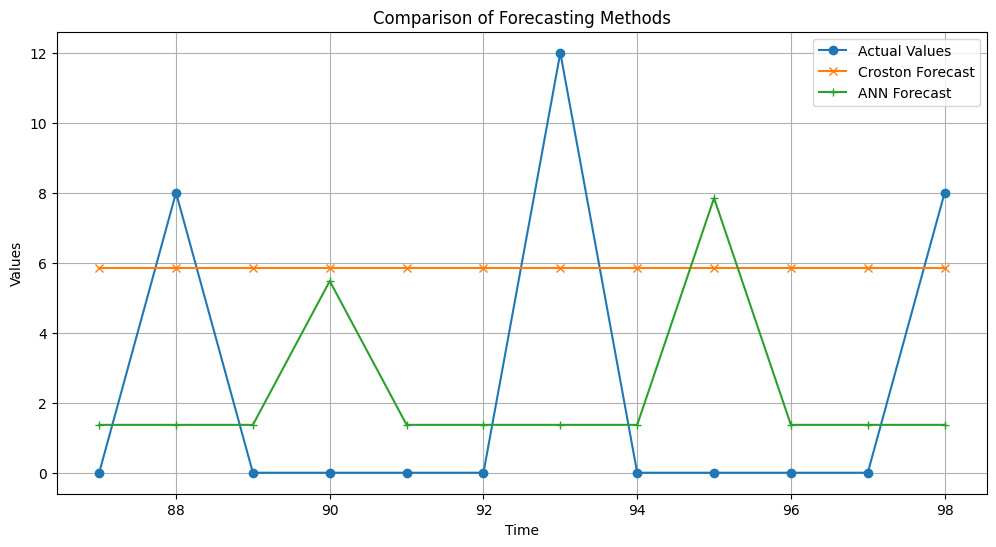

Croston RMSE: 5.447217399535875
ANN RMSE: 5.047212665444567
Croston MSE: 29.672177397806383
ANN MSE: 25.474355690224048
Croston MAE: 5.264224700511826
ANN MAE: 3.8995534578959146


In [143]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

# Assuming 'data' has been defined elsewhere in the script, as provided in your previous message.
data = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 10, 0, 0, 12, 0, 0, 0, 0, 0, 0, 2, 0, 8, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 40, 10, 0, 38, 60, 0, 0, 0, 0, 8, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 12, 0, 0, 0, 0, 8])
train, test = data[:-12], data[-12:]

croston_forecast = croston_basic(train, extra_periods=12)
# Calculate error metrics for Croston method
croston_mse = mean_squared_error(test, croston_forecast)
croston_rmse = mean_squared_error(test, croston_forecast, squared=False)
croston_mae = mean_absolute_error(test, croston_forecast)

# ANN Forecasting
data = data.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

look_back = 1
X, y = create_dataset(data_scaled, look_back)
X_train, X_test = X[:-12], X[-12:]
y_train, y_test = y[:-12], y[-12:]

model = Sequential()
model.add(Dense(50, input_shape=(look_back,), activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=0)

train_predict = model.predict(X_train)
test_predict = model.predict(X_test)
test_predict = scaler.inverse_transform(test_predict)

ann_rmse = np.sqrt(mean_squared_error(test, test_predict[:,0]))
ann_mse = mean_squared_error(test, test_predict[:,0])
ann_mae = mean_absolute_error(test, test_predict[:,0])

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(range(len(data)-12, len(data)), test, label='Actual Values', marker='o')
plt.plot(range(len(data)-12, len(data)), croston_forecast, label='Croston Forecast', marker='x')
plt.plot(range(len(data)-12, len(data)), test_predict[:,0], label='ANN Forecast', marker='+')
plt.title('Comparison of Forecasting Methods')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

# Print error metrics
print("Croston RMSE:", croston_rmse)
print("ANN RMSE:", ann_rmse)
print("Croston MSE:", croston_mse)
print("ANN MSE:", ann_mse)
print("Croston MAE:", croston_mae)
print("ANN MAE:", ann_mae)


C:\Users\salih\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\salih\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


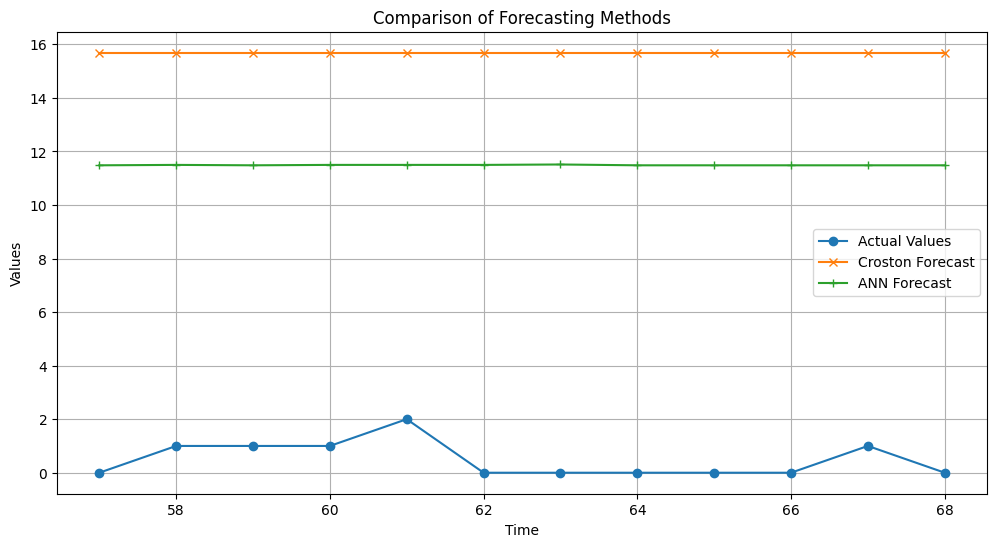

Croston RMSE: 15.20126082419483
ANN RMSE: 11.008849845215888
Croston MSE: 231.07833064520048
ANN MSE: 121.19477491450986
Croston MAE: 15.187549637072264
ANN MAE: 10.990020751953125


In [144]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

# Assuming 'data' has been defined elsewhere in the script, as provided in your previous message.
data = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 121, 1, 0, 500, 30, 0, 0, 1, 0, 1, 0, 1, 1, 1, 2, 0, 0, 0, 0, 0, 1, 0])
train, test = data[:-12], data[-12:]


croston_forecast = croston_basic(train, extra_periods=12)
# Calculate error metrics for Croston method
croston_mse = mean_squared_error(test, croston_forecast)
croston_rmse = mean_squared_error(test, croston_forecast, squared=False)
croston_mae = mean_absolute_error(test, croston_forecast)

# ANN Forecasting
data = data.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

look_back = 1
X, y = create_dataset(data_scaled, look_back)
X_train, X_test = X[:-12], X[-12:]
y_train, y_test = y[:-12], y[-12:]

model = Sequential()
model.add(Dense(50, input_shape=(look_back,), activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=0)

train_predict = model.predict(X_train)
test_predict = model.predict(X_test)
test_predict = scaler.inverse_transform(test_predict)

ann_rmse = np.sqrt(mean_squared_error(test, test_predict[:,0]))
ann_mse = mean_squared_error(test, test_predict[:,0])
ann_mae = mean_absolute_error(test, test_predict[:,0])

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(range(len(data)-12, len(data)), test, label='Actual Values', marker='o')
plt.plot(range(len(data)-12, len(data)), croston_forecast, label='Croston Forecast', marker='x')
plt.plot(range(len(data)-12, len(data)), test_predict[:,0], label='ANN Forecast', marker='+')
plt.title('Comparison of Forecasting Methods')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

# Print error metrics
print("Croston RMSE:", croston_rmse)
print("ANN RMSE:", ann_rmse)
print("Croston MSE:", croston_mse)
print("ANN MSE:", ann_mse)
print("Croston MAE:", croston_mae)
print("ANN MAE:", ann_mae)

`MCM vs Croston`

Croston RMSE: 28.29413227948413
MCM RMSE: 20.453409914052166
Croston MSE: 800.5579214489459
MCM MSE: 418.3419771122474
Croston MAE: 20.558313038891615
MCM MAE: 8.666666666666666


C:\Users\salih\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\salih\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


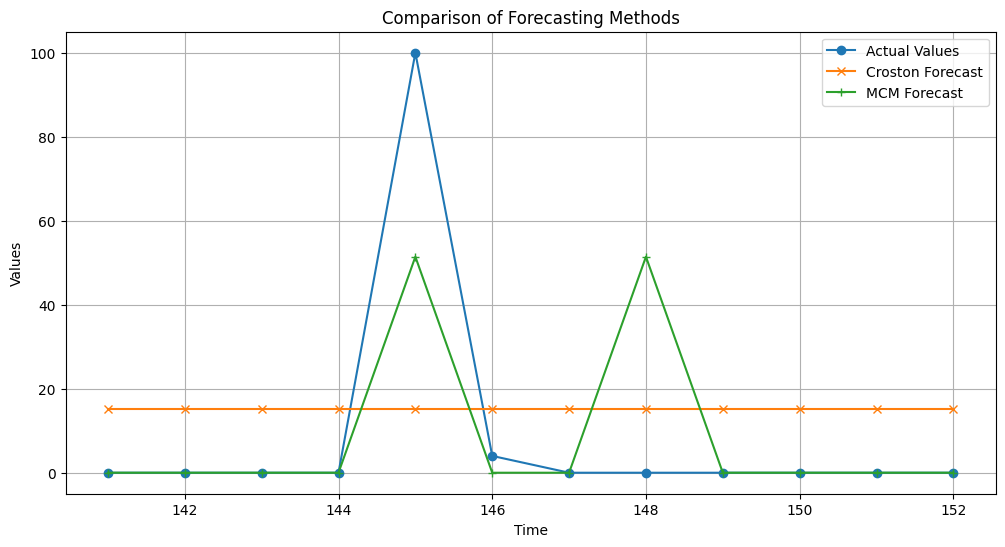

In [145]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
data = np.array([0, 1, 0, 3, 1, 6, 0, 2, 0, 0, 0, 12, 0, 2, 65, 0, 0, 1, 0, 0, 1, 0, 0, 0, 100, 4, 0, 8, 0, 0, 0, 0, 12, 16, 0, 0, 0, 24, 0, 4, 0, 100, 0, 0, 16, 0, 0, 0, 0, 0, 0, 0, 0, 0, 100, 100, 0, 0, 0, 0, 0, 300, 0, 0, 0, 0, 4, 0, 1, 0, 0, 0, 0, 0, 4, 180, 0, 0, 0, 0, 12, 0, 0, 0, 0, 0, 0, 0, 100, 6, 0, 0, 6, 116, 1, 0, 0, 0, 0, 100, 0, 0, 0, 0, 0, 0, 0, 100, 0, 0, 0, 0, 0, 100, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 200, 0, 0, 0, 0, 0, 0, 0, 0, 95, 0, 0, 0, 0, 0, 0, 0, 0, 0, 100, 4, 0, 0, 0, 0, 0, 0])
# Define the length of the forecast
extra_periods = 12
train = data[:-extra_periods]  # Training data excludes the last 'extra_periods' data points
test = data[-extra_periods:]   # Test data includes only the last 'extra_periods' data points

croston_forecast = croston_basic(train, extra_periods=12)

# MCM Forecasting
def mcm_forecast(ts, extra_periods=12):
    forecast = np.zeros(extra_periods)
    demand = ts > 0
    state_transition = np.zeros((2, 2))
    for i in range(1, len(demand)):
        state_transition[int(demand[i-1]), int(demand[i])] += 1
    state_transition[0, :] /= np.sum(state_transition[0, :]) if np.sum(state_transition[0, :]) > 0 else 1
    state_transition[1, :] /= np.sum(state_transition[1, :]) if np.sum(state_transition[1, :]) > 0 else 1
    last_state = demand[-1]
    prob_of_demand = state_transition[int(last_state), 1]
    expected_value = np.mean(ts[demand])  # Average of non-zero demands
    for i in range(extra_periods):
        if np.random.rand() < prob_of_demand:
            forecast[i] = expected_value
        else:
            forecast[i] = 0
    return forecast

mcm_forecast = mcm_forecast(train, extra_periods=12)
# Calculate error metrics for Croston method
croston_mse = mean_squared_error(test, croston_forecast)
croston_rmse = mean_squared_error(test, croston_forecast, squared=False)
croston_mae = mean_absolute_error(test, croston_forecast)

# Calculate error metrics for MCM method
mcm_mse = mean_squared_error(test, mcm_forecast)
mcm_rmse = mean_squared_error(test, mcm_forecast, squared=False)
mcm_mae = mean_absolute_error(test, mcm_forecast)

# Print error metrics results
print("Croston RMSE:", croston_rmse)
print("MCM RMSE:", mcm_rmse)
print("Croston MSE:", croston_mse)
print("MCM MSE:", mcm_mse)
print("Croston MAE:", croston_mae)
print("MCM MAE:", mcm_mae)

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(range(len(data)-12, len(data)), test, label='Actual Values', marker='o')
plt.plot(range(len(data)-12, len(data)), croston_forecast, label='Croston Forecast', marker='x')
plt.plot(range(len(data)-12, len(data)), mcm_forecast, label='MCM Forecast', marker='+')
plt.title('Comparison of Forecasting Methods')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()




C:\Users\salih\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\salih\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Croston RMSE: 18.211373143900776
MCM RMSE: 21.379229484413322
Croston MSE: 331.6541117863904
MCM MSE: 457.07145334720786
Croston MAE: 13.843031666541568
MCM MAE: 12.897849462365592


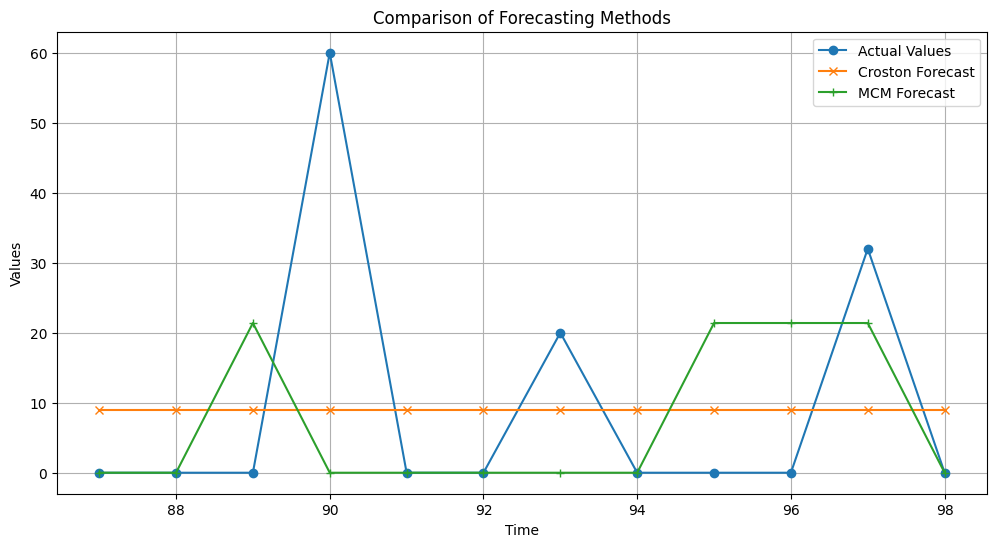

In [146]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Data
data = np.array([75, 0, 1, 0, 0, 0, 0, 0, 12, 0, 0, 0, 0, 0, 0, 8, 12, 0, 0, 0, 0, 0, 62, 1, 0, 1, 0, 5, 0, 0, 4, 16, 4, 13, 100, 0, 6, 13, 5, 10, 2, 0, 0, 0, 5, 16, 0, 0, 0, 0, 0, 0, 1, 18, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 40, 0, 0, 0, 10, 0, 0, 0, 0, 100, 0, 87, 0, 2, 12, 10, 0, 0, 12, 0, 0, 0, 0, 60, 0, 0, 20, 0, 0, 0, 32, 0])

# Define the length of the forecast
extra_periods = 12
train = data[:-extra_periods]  # Training data excludes the last 'extra_periods' data points
test = data[-extra_periods:]   # Test data includes only the last 'extra_periods' data points
croston_forecast = croston_basic(train, extra_periods=12)


# MCM Forecasting
def mcm_forecast(ts, extra_periods=12):
    forecast = np.zeros(extra_periods)
    demand = ts > 0
    state_transition = np.zeros((2, 2))
    for i in range(1, len(demand)):
        state_transition[int(demand[i-1]), int(demand[i])] += 1
    state_transition[0, :] /= np.sum(state_transition[0, :]) if np.sum(state_transition[0, :]) > 0 else 1
    state_transition[1, :] /= np.sum(state_transition[1, :]) if np.sum(state_transition[1, :]) > 0 else 1
    last_state = demand[-1]
    prob_of_demand = state_transition[int(last_state), 1]
    expected_value = np.mean(ts[demand])  # Average of non-zero demands
    for i in range(extra_periods):
        if np.random.rand() < prob_of_demand:
            forecast[i] = expected_value
        else:
            forecast[i] = 0
    return forecast

mcm_forecast = mcm_forecast(train, extra_periods=12)
# Calculate error metrics for Croston method
croston_mse = mean_squared_error(test, croston_forecast)
croston_rmse = mean_squared_error(test, croston_forecast, squared=False)
croston_mae = mean_absolute_error(test, croston_forecast)

# Calculate error metrics for MCM method
mcm_mse = mean_squared_error(test, mcm_forecast)
mcm_rmse = mean_squared_error(test, mcm_forecast, squared=False)
mcm_mae = mean_absolute_error(test, mcm_forecast)

# Print error metrics results
print("Croston RMSE:", croston_rmse)
print("MCM RMSE:", mcm_rmse)
print("Croston MSE:", croston_mse)
print("MCM MSE:", mcm_mse)
print("Croston MAE:", croston_mae)
print("MCM MAE:", mcm_mae)

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(range(len(data)-12, len(data)), test, label='Actual Values', marker='o')
plt.plot(range(len(data)-12, len(data)), croston_forecast, label='Croston Forecast', marker='x')
plt.plot(range(len(data)-12, len(data)), mcm_forecast, label='MCM Forecast', marker='+')
plt.title('Comparison of Forecasting Methods')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()




C:\Users\salih\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\salih\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Croston RMSE: 5.447217399535875
MCM RMSE: 8.570378573253862
Croston MSE: 29.672177397806383
MCM MSE: 73.4513888888889
Croston MAE: 5.264224700511826
MCM MAE: 5.291666666666667


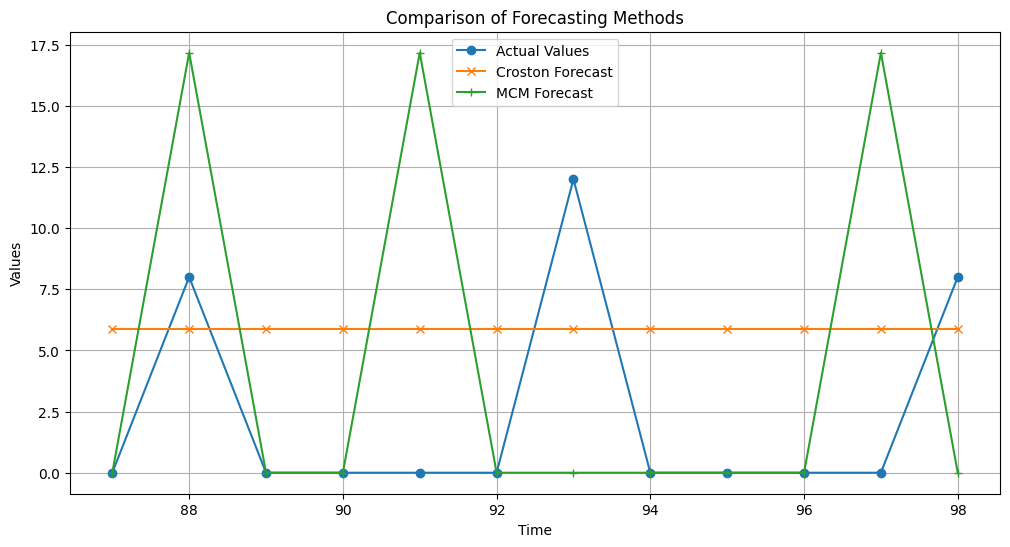

In [147]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Data
data = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 10, 0, 0, 12, 0, 0, 0, 0, 0, 0, 2, 0, 8, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 40, 10, 0, 38, 60, 0, 0, 0, 0, 8, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 12, 0, 0, 0, 0, 8])
# Define the length of the forecast
extra_periods = 12
train = data[:-extra_periods]  # Training data excludes the last 'extra_periods' data points
test = data[-extra_periods:]   # Test data includes only the last 'extra_periods' data points
croston_forecast = croston_basic(train, extra_periods=12)


# MCM Forecasting
def mcm_forecast(ts, extra_periods=12):
    forecast = np.zeros(extra_periods)
    demand = ts > 0
    state_transition = np.zeros((2, 2))
    for i in range(1, len(demand)):
        state_transition[int(demand[i-1]), int(demand[i])] += 1
    state_transition[0, :] /= np.sum(state_transition[0, :]) if np.sum(state_transition[0, :]) > 0 else 1
    state_transition[1, :] /= np.sum(state_transition[1, :]) if np.sum(state_transition[1, :]) > 0 else 1
    last_state = demand[-1]
    prob_of_demand = state_transition[int(last_state), 1]
    expected_value = np.mean(ts[demand])  # Average of non-zero demands
    for i in range(extra_periods):
        if np.random.rand() < prob_of_demand:
            forecast[i] = expected_value
        else:
            forecast[i] = 0
    return forecast

mcm_forecast = mcm_forecast(train, extra_periods=12)

# Calculate error metrics for Croston method
croston_mse = mean_squared_error(test, croston_forecast)
croston_rmse = mean_squared_error(test, croston_forecast, squared=False)
croston_mae = mean_absolute_error(test, croston_forecast)

# Calculate error metrics for MCM method
mcm_mse = mean_squared_error(test, mcm_forecast)
mcm_rmse = mean_squared_error(test, mcm_forecast, squared=False)
mcm_mae = mean_absolute_error(test, mcm_forecast)

# Print error metrics results
print("Croston RMSE:", croston_rmse)
print("MCM RMSE:", mcm_rmse)
print("Croston MSE:", croston_mse)
print("MCM MSE:", mcm_mse)
print("Croston MAE:", croston_mae)
print("MCM MAE:", mcm_mae)

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(range(len(data)-12, len(data)), test, label='Actual Values', marker='o')
plt.plot(range(len(data)-12, len(data)), croston_forecast, label='Croston Forecast', marker='x')
plt.plot(range(len(data)-12, len(data)), mcm_forecast, label='MCM Forecast', marker='+')
plt.title('Comparison of Forecasting Methods')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()



C:\Users\salih\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\salih\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Croston RMSE: 15.20126082419483
MCM RMSE: 35.5117351495718
Croston MSE: 231.07833064520048
MCM MSE: 1261.0833333333333
Croston MAE: 15.187549637072264
MCM MAE: 23.416666666666668


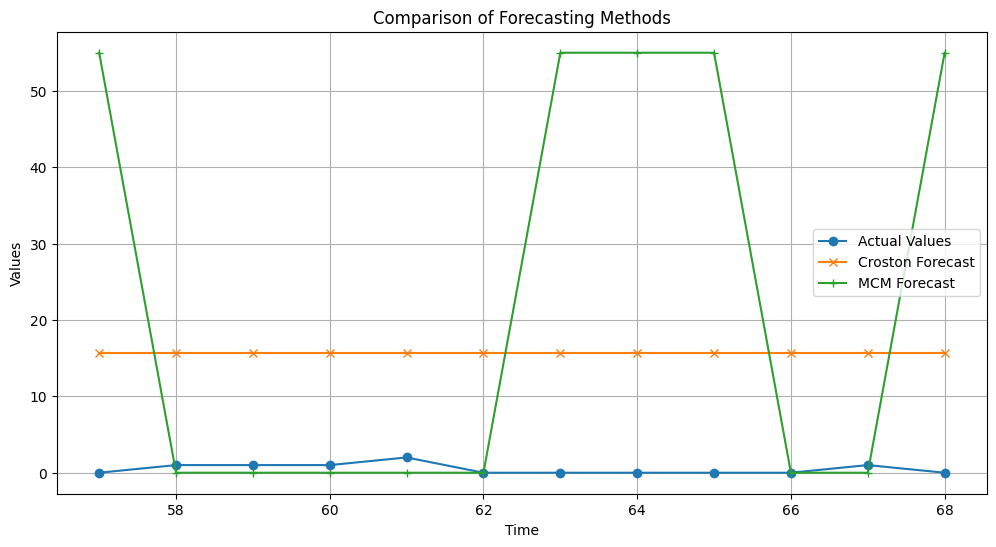

In [148]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Data
data = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 121, 1, 0, 500, 30, 0, 0, 1, 0, 1, 0, 1, 1, 1, 2, 0, 0, 0, 0, 0, 1, 0])
# Define the length of the forecast
extra_periods = 12
train = data[:-extra_periods]  # Training data excludes the last 'extra_periods' data points
test = data[-extra_periods:]   # Test data includes only the last 'extra_periods' data points
croston_forecast = croston_basic(train, extra_periods=12)


# MCM Forecasting
def mcm_forecast(ts, extra_periods=12):
    forecast = np.zeros(extra_periods)
    demand = ts > 0
    state_transition = np.zeros((2, 2))
    for i in range(1, len(demand)):
        state_transition[int(demand[i-1]), int(demand[i])] += 1
    state_transition[0, :] /= np.sum(state_transition[0, :]) if np.sum(state_transition[0, :]) > 0 else 1
    state_transition[1, :] /= np.sum(state_transition[1, :]) if np.sum(state_transition[1, :]) > 0 else 1
    last_state = demand[-1]
    prob_of_demand = state_transition[int(last_state), 1]
    expected_value = np.mean(ts[demand])  # Average of non-zero demands
    for i in range(extra_periods):
        if np.random.rand() < prob_of_demand:
            forecast[i] = expected_value
        else:
            forecast[i] = 0
    return forecast

mcm_forecast = mcm_forecast(train, extra_periods=12)


# Calculate error metrics for Croston method
croston_mse = mean_squared_error(test, croston_forecast)
croston_rmse = mean_squared_error(test, croston_forecast, squared=False)
croston_mae = mean_absolute_error(test, croston_forecast)

# Calculate error metrics for MCM method
mcm_mse = mean_squared_error(test, mcm_forecast)
mcm_rmse = mean_squared_error(test, mcm_forecast, squared=False)
mcm_mae = mean_absolute_error(test, mcm_forecast)

# Print error metrics results
print("Croston RMSE:", croston_rmse)
print("MCM RMSE:", mcm_rmse)
print("Croston MSE:", croston_mse)
print("MCM MSE:", mcm_mse)
print("Croston MAE:", croston_mae)
print("MCM MAE:", mcm_mae)

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(range(len(data)-12, len(data)), test, label='Actual Values', marker='o')
plt.plot(range(len(data)-12, len(data)), croston_forecast, label='Croston Forecast', marker='x')
plt.plot(range(len(data)-12, len(data)), mcm_forecast, label='MCM Forecast', marker='+')
plt.title('Comparison of Forecasting Methods')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()



`SBA vs Croston`

C:\Users\salih\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\salih\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Croston RMSE: 28.29413227948413
SBA RMSE: 28.121007471694845
Croston MSE: 800.5579214489459
SBA MSE: 790.7910612231173
Croston MAE: 20.558313038891615
SBA MAE: 19.879616706292843


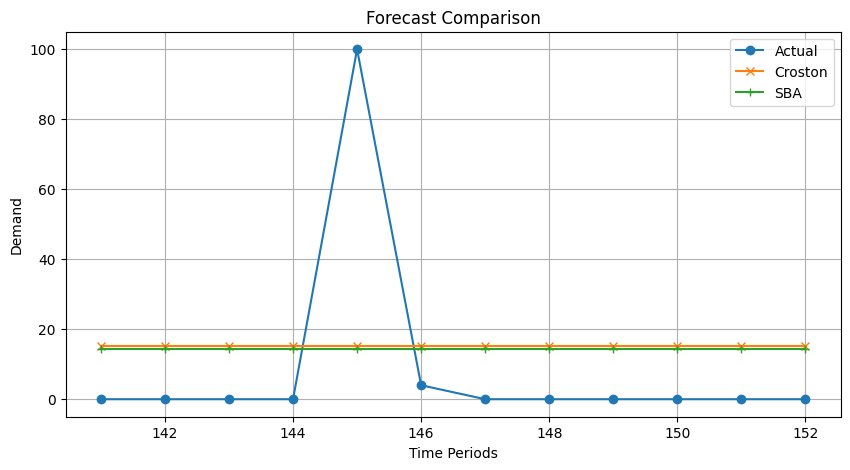

In [149]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error

# Data
data = np.array([0, 1, 0, 3, 1, 6, 0, 2, 0, 0, 0, 12, 0, 2, 65, 0, 0, 1, 0, 0, 1, 0, 0, 0, 100, 4, 0, 8, 0, 0, 0, 0, 12, 16,
                 0, 0, 0, 24, 0, 4, 0, 100, 0, 0, 16, 0, 0, 0, 0, 0, 0, 0, 0, 0, 100, 100, 0, 0, 0, 0, 0, 300, 0, 0, 0, 0, 4,
                 0, 1, 0, 0, 0, 0, 0, 4, 180, 0, 0, 0, 0, 12, 0, 0, 0, 0, 0, 0, 0, 100, 6, 0, 0, 6, 116, 1, 0, 0, 0, 0, 100,
                 0, 0, 0, 0, 0, 0, 0, 100, 0, 0, 0, 0, 0, 100, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 200, 0, 0, 0, 0, 0, 0, 0,
                 0, 95, 0, 0, 0, 0, 0, 0, 0, 0, 0, 100, 4, 0, 0, 0, 0, 0, 0])

# Define the length of the forecast
extra_periods = 12
train = data[:-extra_periods]  # Training data excludes the last 'extra_periods' data points
test = data[-extra_periods:]   # Test data includes only the last 'extra_periods' data points
croston_forecast = croston_basic(train, extra_periods=12)

# SBA Method Function
def sba(ts, extra_periods=12, alpha=0.1):
    d = np.array(ts)
    n = len(d)
    d = np.append(d,[np.nan]*extra_periods)
    
    # Arrays to store demand sizes and intervals
    q = 1
    demand = np.where(d > 0)[0]
    intervals = np.diff(np.append(-1, demand)) - 1
    demands = d[demand]
    
    # Initialize forecasts
    forecast = np.zeros(extra_periods)
    if len(demands) == 0:
        return forecast
    
    # Initialize states
    z = demands[0]
    v = intervals[0]
    
    for t in range(1, len(demand)):
        z = alpha * demands[t] + (1-alpha) * z
        v = alpha * intervals[t] + (1-alpha) * v
    
    # Correction factor for SBA
    correction_factor = 1 - alpha/2
    
    # Forecast for all extra periods
    forecast[:] = correction_factor * z / (v + 1)
    return forecast


sba_forecast = sba(train, extra_periods=12)

# Calculate error metrics for Croston method
croston_mse = mean_squared_error(test, croston_forecast)
croston_rmse = mean_squared_error(test, croston_forecast, squared=False)
croston_mae = mean_absolute_error(test, croston_forecast)

# Calculate error metrics for TSB method
sba_mse = mean_squared_error(test, sba_forecast)
sba_rmse = mean_squared_error(test, sba_forecast, squared=False)
sba_mae = mean_absolute_error(test, sba_forecast)

# Print error metrics results
print("Croston RMSE:", croston_rmse)
print("SBA RMSE:", sba_rmse)
print("Croston MSE:", croston_mse)
print("SBA MSE:", sba_mse)
print("Croston MAE:", croston_mae)
print("SBA MAE:", sba_mae)

# Optional: Plot the results for visual comparison
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(range(len(data)-12, len(data)), test, label='Actual', marker='o')
plt.plot(range(len(data)-12, len(data)), croston_forecast, label='Croston', marker='x')
plt.plot(range(len(data)-12, len(data)), sba_forecast, label='SBA', marker='+')
plt.title('Forecast Comparison')
plt.xlabel('Time Periods')
plt.ylabel('Demand')
plt.legend()
plt.grid(True)
plt.show()


C:\Users\salih\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\salih\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Croston RMSE: 18.211373143900776
SBA RMSE: 18.22472599271828
Croston MSE: 331.6541117863904
SBA MSE: 332.14063750966136
Croston MAE: 13.843031666541568
SBA MAE: 13.617546749881155


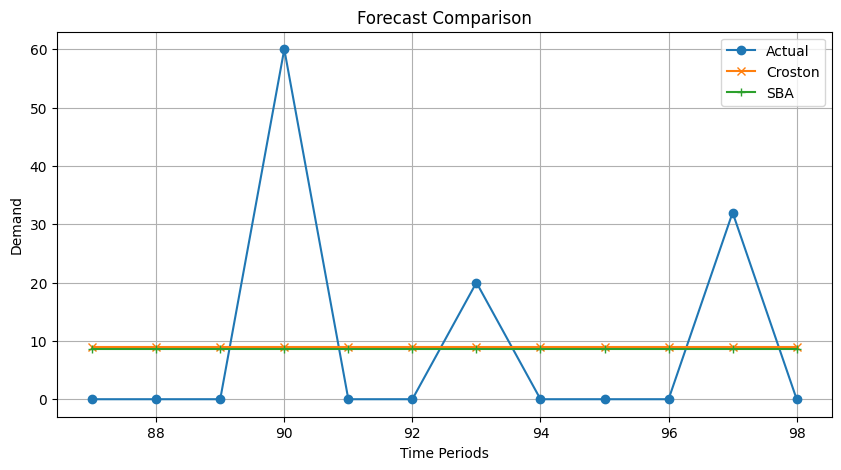

In [150]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error

# Data
data = np.array([75, 0, 1, 0, 0, 0, 0, 0, 12, 0, 0, 0, 0, 0, 0, 8, 12, 0, 0, 0, 0, 0, 62, 1, 0, 1, 0, 5, 0, 0, 4, 16, 4, 13, 100, 0, 6, 13, 5, 10, 2, 0, 0, 0, 5, 16, 0, 0, 0, 0, 0, 0, 1, 18, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 40, 0, 0, 0, 10, 0, 0, 0, 0, 100, 0, 87, 0, 2, 12, 10, 0, 0, 12, 0, 0, 0, 0, 60, 0, 0, 20, 0, 0, 0, 32, 0])

# Define the length of the forecast
extra_periods = 12
train = data[:-extra_periods]  # Training data excludes the last 'extra_periods' data points
test = data[-extra_periods:]   # Test data includes only the last 'extra_periods' data points
croston_forecast = croston_basic(train, extra_periods=12)

# SBA Method Function
def sba(ts, extra_periods=12, alpha=0.1):
    d = np.array(ts)
    n = len(d)
    d = np.append(d,[np.nan]*extra_periods)
    
    # Arrays to store demand sizes and intervals
    q = 1
    demand = np.where(d > 0)[0]
    intervals = np.diff(np.append(-1, demand)) - 1
    demands = d[demand]
    
    # Initialize forecasts
    forecast = np.zeros(extra_periods)
    if len(demands) == 0:
        return forecast
    
    # Initialize states
    z = demands[0]
    v = intervals[0]
    
    for t in range(1, len(demand)):
        z = alpha * demands[t] + (1-alpha) * z
        v = alpha * intervals[t] + (1-alpha) * v
    
    # Correction factor for SBA
    correction_factor = 1 - alpha/2
    
    # Forecast for all extra periods
    forecast[:] = correction_factor * z / (v + 1)
    return forecast


sba_forecast = sba(train, extra_periods=12)

# Calculate error metrics for Croston method
croston_mse = mean_squared_error(test, croston_forecast)
croston_rmse = mean_squared_error(test, croston_forecast, squared=False)
croston_mae = mean_absolute_error(test, croston_forecast)

# Calculate error metrics for TSB method
sba_mse = mean_squared_error(test, sba_forecast)
sba_rmse = mean_squared_error(test, sba_forecast, squared=False)
sba_mae = mean_absolute_error(test, sba_forecast)

# Print error metrics results
print("Croston RMSE:", croston_rmse)
print("SBA RMSE:", sba_rmse)
print("Croston MSE:", croston_mse)
print("SBA MSE:", sba_mse)
print("Croston MAE:", croston_mae)
print("SBA MAE:", sba_mae)
# Optional: Plot the results for visual comparison
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(range(len(data)-12, len(data)), test, label='Actual', marker='o')
plt.plot(range(len(data)-12, len(data)), croston_forecast, label='Croston', marker='x')
plt.plot(range(len(data)-12, len(data)), sba_forecast, label='SBA', marker='+')
plt.title('Forecast Comparison')
plt.xlabel('Time Periods')
plt.ylabel('Demand')
plt.legend()
plt.grid(True)
plt.show()


C:\Users\salih\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\salih\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Croston RMSE: 5.447217399535875
SBA RMSE: 4.227729017516301
Croston MSE: 29.672177397806383
SBA MSE: 17.87369264554935
Croston MAE: 5.264224700511826
SBA MAE: 3.096431411242422


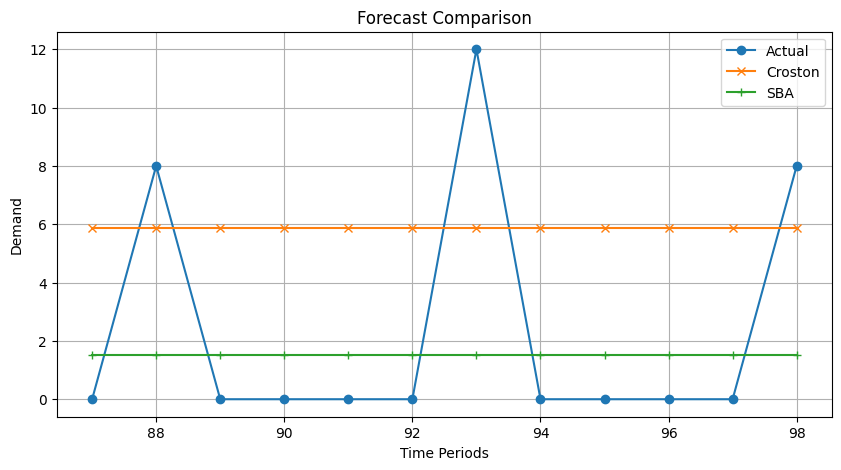

In [151]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error

# Data
data = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 10, 0, 0, 12, 0, 0, 0, 0, 0, 0, 2, 0, 8, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 40, 10, 0, 38, 60, 0, 0, 0, 0, 8, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 12, 0, 0, 0, 0, 8])

# Define the length of the forecast
extra_periods = 12
train = data[:-extra_periods]  # Training data excludes the last 'extra_periods' data points
test = data[-extra_periods:]   # Test data includes only the last 'extra_periods' data points
croston_forecast = croston_basic(train, extra_periods=12)

# SBA Method Function
def sba(ts, extra_periods=12, alpha=0.1):
    d = np.array(ts)
    n = len(d)
    d = np.append(d,[np.nan]*extra_periods)
    
    # Arrays to store demand sizes and intervals
    q = 1
    demand = np.where(d > 0)[0]
    intervals = np.diff(np.append(-1, demand)) - 1
    demands = d[demand]
    
    # Initialize forecasts
    forecast = np.zeros(extra_periods)
    if len(demands) == 0:
        return forecast
    
    # Initialize states
    z = demands[0]
    v = intervals[0]
    
    for t in range(1, len(demand)):
        z = alpha * demands[t] + (1-alpha) * z
        v = alpha * intervals[t] + (1-alpha) * v
    
    # Correction factor for SBA
    correction_factor = 1 - alpha/2
    
    # Forecast for all extra periods
    forecast[:] = correction_factor * z / (v + 1)
    return forecast


sba_forecast = sba(train, extra_periods=12)

# Calculate error metrics for Croston method
croston_mse = mean_squared_error(test, croston_forecast)
croston_rmse = mean_squared_error(test, croston_forecast, squared=False)
croston_mae = mean_absolute_error(test, croston_forecast)

# Calculate error metrics for TSB method
sba_mse = mean_squared_error(test, sba_forecast)
sba_rmse = mean_squared_error(test, sba_forecast, squared=False)
sba_mae = mean_absolute_error(test, sba_forecast)

# Print error metrics results
print("Croston RMSE:", croston_rmse)
print("SBA RMSE:", sba_rmse)
print("Croston MSE:", croston_mse)
print("SBA MSE:", sba_mse)
print("Croston MAE:", croston_mae)
print("SBA MAE:", sba_mae)
# Optional: Plot the results for visual comparison
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(range(len(data)-12, len(data)), test, label='Actual', marker='o')
plt.plot(range(len(data)-12, len(data)), croston_forecast, label='Croston', marker='x')
plt.plot(range(len(data)-12, len(data)), sba_forecast, label='SBA', marker='+')
plt.title('Forecast Comparison')
plt.xlabel('Time Periods')
plt.ylabel('Demand')
plt.legend()
plt.grid(True)
plt.show()


C:\Users\salih\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\salih\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Croston RMSE: 15.20126082419483
SBA RMSE: 6.442272669120489
Croston MSE: 231.07833064520048
SBA MSE: 41.50287714329683
Croston MAE: 15.187549637072264
SBA MAE: 6.409852609587067


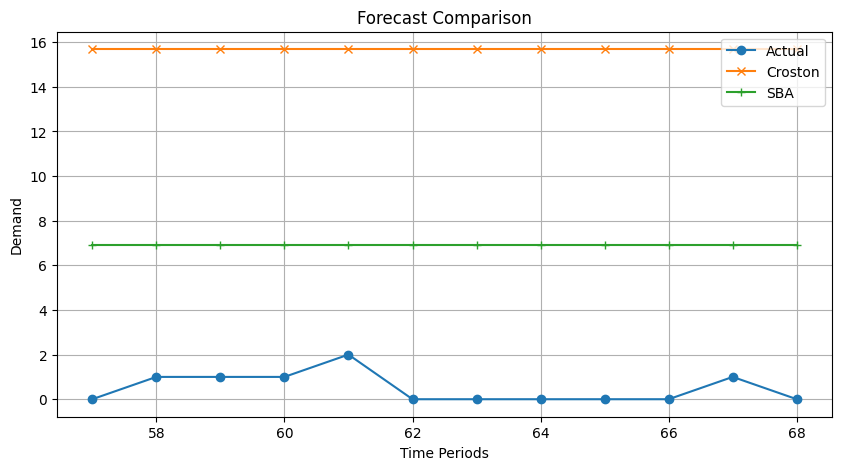

In [152]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error

# Data
data = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 121, 1, 0, 500, 30, 0, 0, 1, 0, 1, 0, 1, 1, 1, 2, 0, 0, 0, 0, 0, 1, 0])

# Define the length of the forecast
extra_periods = 12
train = data[:-extra_periods]  # Training data excludes the last 'extra_periods' data points
test = data[-extra_periods:]   # Test data includes only the last 'extra_periods' data points
croston_forecast = croston_basic(train, extra_periods=12)

# SBA Method Function
def sba(ts, extra_periods=12, alpha=0.1):
    d = np.array(ts)
    n = len(d)
    d = np.append(d,[np.nan]*extra_periods)
    
    # Arrays to store demand sizes and intervals
    q = 1
    demand = np.where(d > 0)[0]
    intervals = np.diff(np.append(-1, demand)) - 1
    demands = d[demand]
    
    # Initialize forecasts
    forecast = np.zeros(extra_periods)
    if len(demands) == 0:
        return forecast
    
    # Initialize states
    z = demands[0]
    v = intervals[0]
    
    for t in range(1, len(demand)):
        z = alpha * demands[t] + (1-alpha) * z
        v = alpha * intervals[t] + (1-alpha) * v
    
    # Correction factor for SBA
    correction_factor = 1 - alpha/2
    
    # Forecast for all extra periods
    forecast[:] = correction_factor * z / (v + 1)
    return forecast


sba_forecast = sba(train, extra_periods=12)

# Calculate error metrics for Croston method
croston_mse = mean_squared_error(test, croston_forecast)
croston_rmse = mean_squared_error(test, croston_forecast, squared=False)
croston_mae = mean_absolute_error(test, croston_forecast)

# Calculate error metrics for TSB method
sba_mse = mean_squared_error(test, sba_forecast)
sba_rmse = mean_squared_error(test, sba_forecast, squared=False)
sba_mae = mean_absolute_error(test, sba_forecast)

# Print error metrics results
print("Croston RMSE:", croston_rmse)
print("SBA RMSE:", sba_rmse)
print("Croston MSE:", croston_mse)
print("SBA MSE:", sba_mse)
print("Croston MAE:", croston_mae)
print("SBA MAE:", sba_mae)



# Optional: Plot the results for visual comparison
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(range(len(data)-12, len(data)), test, label='Actual', marker='o')
plt.plot(range(len(data)-12, len(data)), croston_forecast, label='Croston', marker='x')
plt.plot(range(len(data)-12, len(data)), sba_forecast, label='SBA', marker='+')
plt.title('Forecast Comparison')
plt.xlabel('Time Periods')
plt.ylabel('Demand')
plt.legend()
plt.grid(True)
plt.show()


`TSB vs Croston`

C:\Users\salih\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\salih\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Croston RMSE: 28.29413227948413
TSB RMSE: 35.47303619803898
Croston MSE: 800.5579214489459
TSB MSE: 1258.336297107384
Croston MAE: 20.558313038891615
TSB MAE: 33.83338862754318


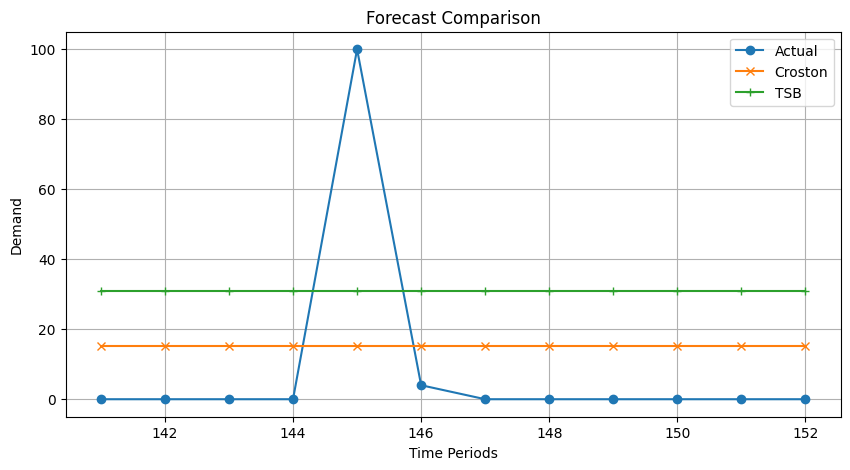

In [153]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Data
data = np.array([0, 1, 0, 3, 1, 6, 0, 2, 0, 0, 0, 12, 0, 2, 65, 0, 0, 1, 0, 0, 1, 0, 0, 0, 100, 4, 0, 8, 0, 0, 0, 0, 12, 16, 0, 0, 0, 24, 0, 4, 0, 100, 0, 0, 16, 0, 0, 0, 0, 0, 0, 0, 0, 0, 100, 100, 0, 0, 0, 0, 0, 300, 0, 0, 0, 0, 4, 0, 1, 0, 0, 0, 0, 0, 4, 180, 0, 0, 0, 0, 12, 0, 0, 0, 0, 0, 0, 0, 100, 6, 0, 0, 6, 116, 1, 0, 0, 0, 0, 100, 0, 0, 0, 0, 0, 0, 0, 100, 0, 0, 0, 0, 0, 100, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 200, 0, 0, 0, 0, 0, 0, 0, 0, 95, 0, 0, 0, 0, 0, 0, 0, 0, 0, 100, 4, 0, 0, 0, 0, 0, 0])
# Define the length of the forecast
extra_periods = 12
train = data[:-extra_periods]  # Training data excludes the last 'extra_periods' data points
test = data[-extra_periods:]   # Test data includes only the last 'extra_periods' data points
croston_forecast = croston_basic(train, extra_periods=12)

# TSB Method
def tsb(ts, extra_periods=12, alpha=0.1, beta=0.1):
    d = np.array(ts)
    n = len(d)
    d = np.append(d,[np.nan]*extra_periods)

    # Initialization
    forecasts = np.zeros(n + extra_periods)
    demand_indices = np.where(d > 0)[0]
    if len(demand_indices) == 0:
        return forecasts

    # Levels, probabilities, and forecast initialization
    z = d[demand_indices[0]]
    p = 1.0 / (1 + demand_indices[0])

    for i in range(1, len(demand_indices)):
        interval = demand_indices[i] - demand_indices[i - 1]
        z = (1 - alpha) * z + alpha * d[demand_indices[i]]
        p = (1 - beta) * p + beta * (1.0 / interval)

    forecasts[n:] = z * p
    return forecasts[-extra_periods:]

# Applying the methods

tsb_forecast = tsb(train, extra_periods=12)

# Calculate error metrics for Croston method
croston_mse = mean_squared_error(test, croston_forecast)
croston_rmse = mean_squared_error(test, croston_forecast, squared=False)
croston_mae = mean_absolute_error(test, croston_forecast)

# Calculate error metrics for TSB method
tsb_mse = mean_squared_error(test, tsb_forecast)
tsb_rmse = mean_squared_error(test, tsb_forecast, squared=False)
tsb_mae = mean_absolute_error(test, tsb_forecast)

# Print error metrics results
print("Croston RMSE:", croston_rmse)
print("TSB RMSE:", tsb_rmse)
print("Croston MSE:", croston_mse)
print("TSB MSE:", tsb_mse)
print("Croston MAE:", croston_mae)
print("TSB MAE:", tsb_mae)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(range(len(data)-12, len(data)), test, label='Actual', marker='o')
plt.plot(range(len(data)-12, len(data)), croston_forecast, label='Croston', marker='x')
plt.plot(range(len(data)-12, len(data)), tsb_forecast, label='TSB', marker='+')
plt.title('Forecast Comparison')
plt.xlabel('Time Periods')
plt.ylabel('Demand')
plt.legend()
plt.grid(True)
plt.show()


C:\Users\salih\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\salih\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Croston RMSE: 18.211373143900776
TSB RMSE: 19.465116051660424
Croston MSE: 331.6541117863904
TSB MSE: 378.89074290460826
Croston MAE: 13.843031666541568
TSB MAE: 17.440028609948346


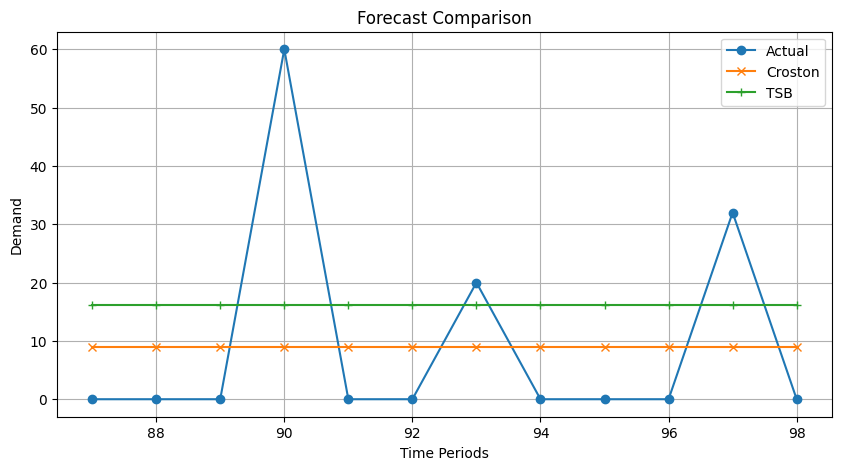

In [154]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Data
data = np.array([75, 0, 1, 0, 0, 0, 0, 0, 12, 0, 0, 0, 0, 0, 0, 8, 12, 0, 0, 0, 0, 0, 62, 1, 0, 1, 0, 5, 0, 0, 4, 16, 4, 13, 100, 0, 6, 13, 5, 10, 2, 0, 0, 0, 5, 16, 0, 0, 0, 0, 0, 0, 1, 18, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 40, 0, 0, 0, 10, 0, 0, 0, 0, 100, 0, 87, 0, 2, 12, 10, 0, 0, 12, 0, 0, 0, 0, 60, 0, 0, 20, 0, 0, 0, 32, 0])
# Define the length of the forecast
extra_periods = 12
train = data[:-extra_periods]  # Training data excludes the last 'extra_periods' data points
test = data[-extra_periods:]   # Test data includes only the last 'extra_periods' data points
croston_forecast = croston_basic(train, extra_periods=12)

# TSB Method
def tsb(ts, extra_periods=12, alpha=0.1, beta=0.1):
    d = np.array(ts)
    n = len(d)
    d = np.append(d,[np.nan]*extra_periods)

    # Initialization
    forecasts = np.zeros(n + extra_periods)
    demand_indices = np.where(d > 0)[0]
    if len(demand_indices) == 0:
        return forecasts

    # Levels, probabilities, and forecast initialization
    z = d[demand_indices[0]]
    p = 1.0 / (1 + demand_indices[0])

    for i in range(1, len(demand_indices)):
        interval = demand_indices[i] - demand_indices[i - 1]
        z = (1 - alpha) * z + alpha * d[demand_indices[i]]
        p = (1 - beta) * p + beta * (1.0 / interval)

    forecasts[n:] = z * p
    return forecasts[-extra_periods:]

# Applying the methods

tsb_forecast = tsb(train, extra_periods=12)

# Calculate error metrics for Croston method
croston_mse = mean_squared_error(test, croston_forecast)
croston_rmse = mean_squared_error(test, croston_forecast, squared=False)
croston_mae = mean_absolute_error(test, croston_forecast)

# Calculate error metrics for TSB method
tsb_mse = mean_squared_error(test, tsb_forecast)
tsb_rmse = mean_squared_error(test, tsb_forecast, squared=False)
tsb_mae = mean_absolute_error(test, tsb_forecast)

# Print error metrics results
print("Croston RMSE:", croston_rmse)
print("TSB RMSE:", tsb_rmse)
print("Croston MSE:", croston_mse)
print("TSB MSE:", tsb_mse)
print("Croston MAE:", croston_mae)
print("TSB MAE:", tsb_mae)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(range(len(data)-12, len(data)), test, label='Actual', marker='o')
plt.plot(range(len(data)-12, len(data)), croston_forecast, label='Croston', marker='x')
plt.plot(range(len(data)-12, len(data)), tsb_forecast, label='TSB', marker='+')
plt.title('Forecast Comparison')
plt.xlabel('Time Periods')
plt.ylabel('Demand')
plt.legend()
plt.grid(True)
plt.show()


C:\Users\salih\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\salih\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Croston RMSE: 5.447217399535875
TSB RMSE: 5.412808312116314
Croston MSE: 29.672177397806383
TSB MSE: 29.298493823715464
Croston MAE: 5.264224700511826
TSB MAE: 5.237546517470341


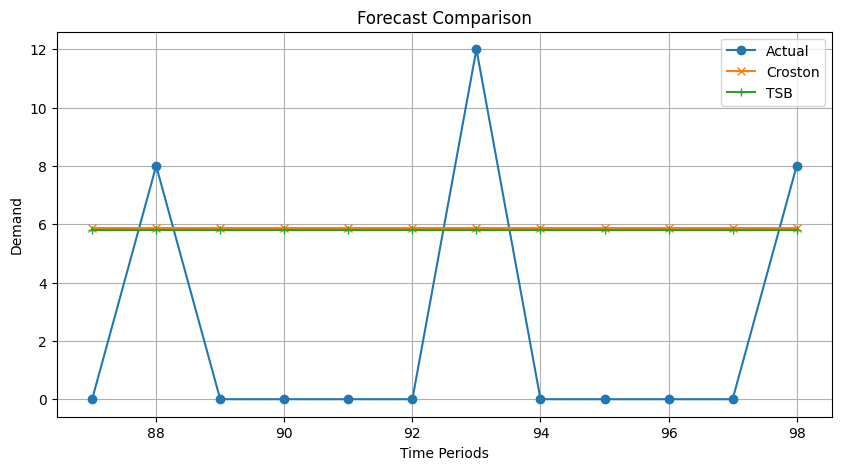

In [155]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Data
data = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 10, 0, 0, 12, 0, 0, 0, 0, 0, 0, 2, 0, 8, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 40, 10, 0, 38, 60, 0, 0, 0, 0, 8, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 12, 0, 0, 0, 0, 8])
# Define the length of the forecast
extra_periods = 12
train = data[:-extra_periods]  # Training data excludes the last 'extra_periods' data points
test = data[-extra_periods:]   # Test data includes only the last 'extra_periods' data points
croston_forecast = croston_basic(train, extra_periods=12)

# TSB Method
def tsb(ts, extra_periods=12, alpha=0.1, beta=0.1):
    d = np.array(ts)
    n = len(d)
    d = np.append(d,[np.nan]*extra_periods)

    # Initialization
    forecasts = np.zeros(n + extra_periods)
    demand_indices = np.where(d > 0)[0]
    if len(demand_indices) == 0:
        return forecasts

    # Levels, probabilities, and forecast initialization
    z = d[demand_indices[0]]
    p = 1.0 / (1 + demand_indices[0])

    for i in range(1, len(demand_indices)):
        interval = demand_indices[i] - demand_indices[i - 1]
        z = (1 - alpha) * z + alpha * d[demand_indices[i]]
        p = (1 - beta) * p + beta * (1.0 / interval)

    forecasts[n:] = z * p
    return forecasts[-extra_periods:]

# Applying the methods

tsb_forecast = tsb(train, extra_periods=12)

# Calculate error metrics for Croston method
croston_mse = mean_squared_error(test, croston_forecast)
croston_rmse = mean_squared_error(test, croston_forecast, squared=False)
croston_mae = mean_absolute_error(test, croston_forecast)

# Calculate error metrics for TSB method
tsb_mse = mean_squared_error(test, tsb_forecast)
tsb_rmse = mean_squared_error(test, tsb_forecast, squared=False)
tsb_mae = mean_absolute_error(test, tsb_forecast)

# Print error metrics results
print("Croston RMSE:", croston_rmse)
print("TSB RMSE:", tsb_rmse)
print("Croston MSE:", croston_mse)
print("TSB MSE:", tsb_mse)
print("Croston MAE:", croston_mae)
print("TSB MAE:", tsb_mae)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(range(len(data)-12, len(data)), test, label='Actual', marker='o')
plt.plot(range(len(data)-12, len(data)), croston_forecast, label='Croston', marker='x')
plt.plot(range(len(data)-12, len(data)), tsb_forecast, label='TSB', marker='+')
plt.title('Forecast Comparison')
plt.xlabel('Time Periods')
plt.ylabel('Demand')
plt.legend()
plt.grid(True)
plt.show()


C:\Users\salih\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\salih\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Croston RMSE: 15.20126082419483
TSB RMSE: 17.527459096201945
Croston MSE: 231.07833064520048
TSB MSE: 307.2118223690323
Croston MAE: 15.187549637072264
TSB MAE: 17.515568951717373


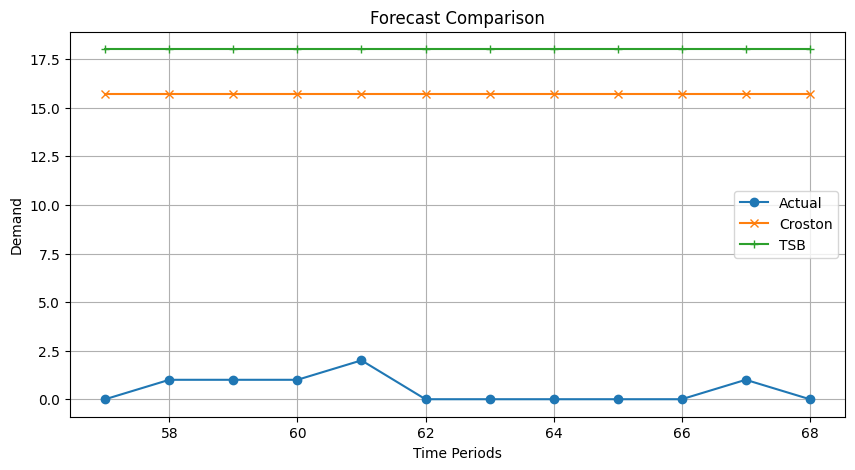

In [156]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Data
data = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 121, 1, 0, 500, 30, 0, 0, 1, 0, 1, 0, 1, 1, 1, 2, 0, 0, 0, 0, 0, 1, 0])
# Define the length of the forecast
extra_periods = 12
train = data[:-extra_periods]  # Training data excludes the last 'extra_periods' data points
test = data[-extra_periods:]   # Test data includes only the last 'extra_periods' data points
croston_forecast = croston_basic(train, extra_periods=12)

# TSB Method
def tsb(ts, extra_periods=12, alpha=0.1, beta=0.1):
    d = np.array(ts)
    n = len(d)
    d = np.append(d,[np.nan]*extra_periods)

    # Initialization
    forecasts = np.zeros(n + extra_periods)
    demand_indices = np.where(d > 0)[0]
    if len(demand_indices) == 0:
        return forecasts

    # Levels, probabilities, and forecast initialization
    z = d[demand_indices[0]]
    p = 1.0 / (1 + demand_indices[0])

    for i in range(1, len(demand_indices)):
        interval = demand_indices[i] - demand_indices[i - 1]
        z = (1 - alpha) * z + alpha * d[demand_indices[i]]
        p = (1 - beta) * p + beta * (1.0 / interval)

    forecasts[n:] = z * p
    return forecasts[-extra_periods:]

# Applying the methods

tsb_forecast = tsb(train, extra_periods=12)

# Calculate error metrics for Croston method
croston_mse = mean_squared_error(test, croston_forecast)
croston_rmse = mean_squared_error(test, croston_forecast, squared=False)
croston_mae = mean_absolute_error(test, croston_forecast)

# Calculate error metrics for TSB method
tsb_mse = mean_squared_error(test, tsb_forecast)
tsb_rmse = mean_squared_error(test, tsb_forecast, squared=False)
tsb_mae = mean_absolute_error(test, tsb_forecast)

# Print error metrics results
print("Croston RMSE:", croston_rmse)
print("TSB RMSE:", tsb_rmse)
print("Croston MSE:", croston_mse)
print("TSB MSE:", tsb_mse)
print("Croston MAE:", croston_mae)
print("TSB MAE:", tsb_mae)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(range(len(data)-12, len(data)), test, label='Actual', marker='o')
plt.plot(range(len(data)-12, len(data)), croston_forecast, label='Croston', marker='x')
plt.plot(range(len(data)-12, len(data)), tsb_forecast, label='TSB', marker='+')
plt.title('Forecast Comparison')
plt.xlabel('Time Periods')
plt.ylabel('Demand')
plt.legend()
plt.grid(True)
plt.show()


`HES vs Croston`

C:\Users\salih\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\salih\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Croston RMSE: 28.29413227948413
HES RMSE: 29.57952035963364
Croston MSE: 800.5579214489459
HES MSE: 874.9480247059811
Croston MAE: 20.558313038891615
HES MAE: 24.173962786617494


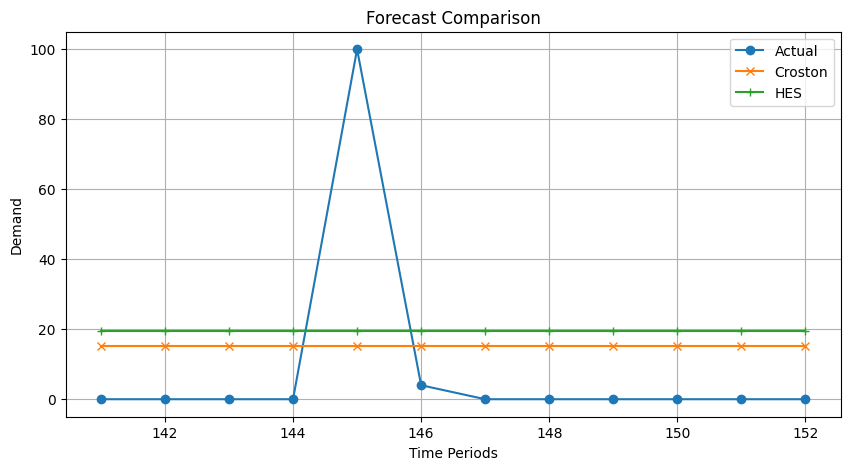

In [157]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Data
data = np.array([0, 1, 0, 3, 1, 6, 0, 2, 0, 0, 0, 12, 0, 2, 65, 0, 0, 1, 0, 0, 1, 0, 0, 0, 100, 4, 0, 8, 0, 0, 0, 0, 12, 16, 0, 0, 0, 24, 0, 4, 0, 100, 0, 0, 16, 0, 0, 0, 0, 0, 0, 0, 0, 0, 100, 100, 0, 0, 0, 0, 0, 300, 0, 0, 0, 0, 4, 0, 1, 0, 0, 0, 0, 0, 4, 180, 0, 0, 0, 0, 12, 0, 0, 0, 0, 0, 0, 0, 100, 6, 0, 0, 6, 116, 1, 0, 0, 0, 0, 100, 0, 0, 0, 0, 0, 0, 0, 100, 0, 0, 0, 0, 0, 100, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 200, 0, 0, 0, 0, 0, 0, 0, 0, 95, 0, 0, 0, 0, 0, 0, 0, 0, 0, 100, 4, 0, 0, 0, 0, 0, 0])
# Define the length of the forecast
extra_periods = 12
train = data[:-extra_periods]  # Training data excludes the last 'extra_periods' data points
test = data[-extra_periods:]   # Test data includes only the last 'extra_periods' data points
croston_forecast = croston_basic(train, extra_periods=12)

# Hyperbolic-Exponential Smoothing
def hyperbolic_exponential_smoothing(ts, extra_periods=12, alpha=0.1, gamma=0.1):
    d = np.array(ts)
    n = len(d)
    d = np.append(d, [np.nan] * extra_periods)

    # Initialization
    forecasts = np.zeros(n + extra_periods)
    demand_indices = np.where(d > 0)[0]
    if len(demand_indices) == 0:
        return forecasts

    # Levels and hyperbolic factors initialization
    z = d[demand_indices[0]]
    h = 1.0 / (1 + demand_indices[0])  # Hyperbolic smoothing component

    for i in range(1, len(demand_indices)):
        interval = demand_indices[i] - demand_indices[i - 1]
        z = (1 - alpha) * z + alpha * d[demand_indices[i]]
        h = (1 - gamma) * h + gamma * (1.0 / (interval + 1))

    forecasts[n:] = z * h
    return forecasts[-extra_periods:]

# Applying the Hyperbolic-Exponential Smoothing
hes_forecast = hyperbolic_exponential_smoothing(train, extra_periods=extra_periods)

# Calculate RMSE, MSE, and MAE for Croston and HES
croston_rmse = mean_squared_error(test, croston_forecast, squared=False)  # Ensure croston_forecast also forecasts 12 periods
hes_rmse = mean_squared_error(test, hes_forecast, squared=False)
croston_mse = mean_squared_error(test, croston_forecast)
hes_mse = mean_squared_error(test, hes_forecast)
croston_mae = mean_absolute_error(test, croston_forecast)
hes_mae = mean_absolute_error(test, hes_forecast)

# Print error metrics
print("Croston RMSE:", croston_rmse)
print("HES RMSE:", hes_rmse)
print("Croston MSE:", croston_mse)
print("HES MSE:", hes_mse)
print("Croston MAE:", croston_mae)
print("HES MAE:", hes_mae)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(range(len(data)-12, len(data)), test, label='Actual', marker='o')
plt.plot(range(len(data)-12, len(data)), croston_forecast, label='Croston', marker='x')
plt.plot(range(len(data)-12, len(data)), hes_forecast, label='HES', marker='+')
plt.title('Forecast Comparison')
plt.xlabel('Time Periods')
plt.ylabel('Demand')
plt.legend()
plt.grid(True)
plt.show()


C:\Users\salih\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\salih\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Croston RMSE: 18.211373143900776
HES RMSE: 18.211502000456864
Croston MSE: 331.6541117863904
HES MSE: 331.6588051126444
Croston MAE: 13.843031666541568
HES MAE: 14.16066234553314


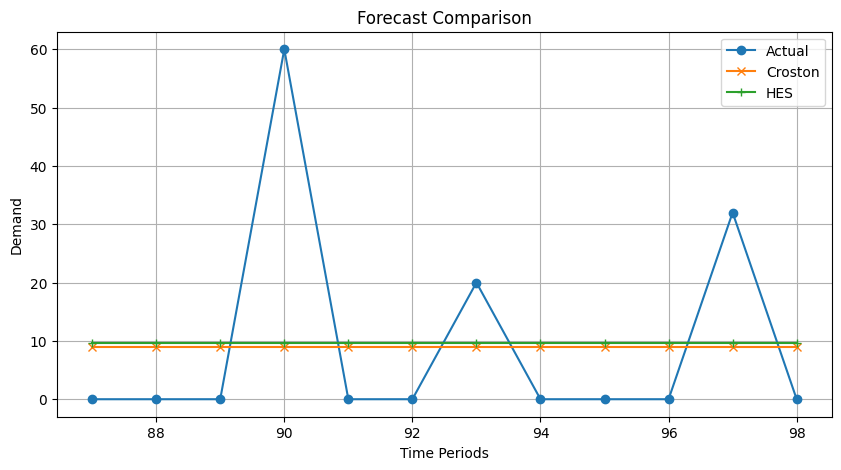

In [158]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Data
data = np.array([75, 0, 1, 0, 0, 0, 0, 0, 12, 0, 0, 0, 0, 0, 0, 8, 12, 0, 0, 0, 0, 0, 62, 1, 0, 1, 0, 5, 0, 0, 4, 16, 4, 13, 100, 0, 6, 13, 5, 10, 2, 0, 0, 0, 5, 16, 0, 0, 0, 0, 0, 0, 1, 18, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 40, 0, 0, 0, 10, 0, 0, 0, 0, 100, 0, 87, 0, 2, 12, 10, 0, 0, 12, 0, 0, 0, 0, 60, 0, 0, 20, 0, 0, 0, 32, 0])
# Define the length of the forecast
extra_periods = 12
train = data[:-extra_periods]  # Training data excludes the last 'extra_periods' data points
test = data[-extra_periods:]   # Test data includes only the last 'extra_periods' data points
croston_forecast = croston_basic(train, extra_periods=12)

# Hyperbolic-Exponential Smoothing
def hyperbolic_exponential_smoothing(ts, extra_periods=12, alpha=0.1, gamma=0.1):
    d = np.array(ts)
    n = len(d)
    d = np.append(d, [np.nan] * extra_periods)

    # Initialization
    forecasts = np.zeros(n + extra_periods)
    demand_indices = np.where(d > 0)[0]
    if len(demand_indices) == 0:
        return forecasts

    # Levels and hyperbolic factors initialization
    z = d[demand_indices[0]]
    h = 1.0 / (1 + demand_indices[0])  # Hyperbolic smoothing component

    for i in range(1, len(demand_indices)):
        interval = demand_indices[i] - demand_indices[i - 1]
        z = (1 - alpha) * z + alpha * d[demand_indices[i]]
        h = (1 - gamma) * h + gamma * (1.0 / (interval + 1))

    forecasts[n:] = z * h
    return forecasts[-extra_periods:]

# Applying the Hyperbolic-Exponential Smoothing
hes_forecast = hyperbolic_exponential_smoothing(train, extra_periods=extra_periods)

# Calculate RMSE, MSE, and MAE for Croston and HES
croston_rmse = mean_squared_error(test, croston_forecast, squared=False)  # Ensure croston_forecast also forecasts 12 periods
hes_rmse = mean_squared_error(test, hes_forecast, squared=False)
croston_mse = mean_squared_error(test, croston_forecast)
hes_mse = mean_squared_error(test, hes_forecast)
croston_mae = mean_absolute_error(test, croston_forecast)
hes_mae = mean_absolute_error(test, hes_forecast)

# Print error metrics
print("Croston RMSE:", croston_rmse)
print("HES RMSE:", hes_rmse)
print("Croston MSE:", croston_mse)
print("HES MSE:", hes_mse)
print("Croston MAE:", croston_mae)
print("HES MAE:", hes_mae)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(range(len(data)-12, len(data)), test, label='Actual', marker='o')
plt.plot(range(len(data)-12, len(data)), croston_forecast, label='Croston', marker='x')
plt.plot(range(len(data)-12, len(data)), hes_forecast, label='HES', marker='+')
plt.title('Forecast Comparison')
plt.xlabel('Time Periods')
plt.ylabel('Demand')
plt.legend()
plt.grid(True)
plt.show()


C:\Users\salih\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\salih\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Croston RMSE: 5.447217399535875
HES RMSE: 4.326568828063535
Croston MSE: 29.672177397806383
HES MSE: 18.719197823971072
Croston MAE: 5.264224700511826
HES MAE: 4.111754771487083


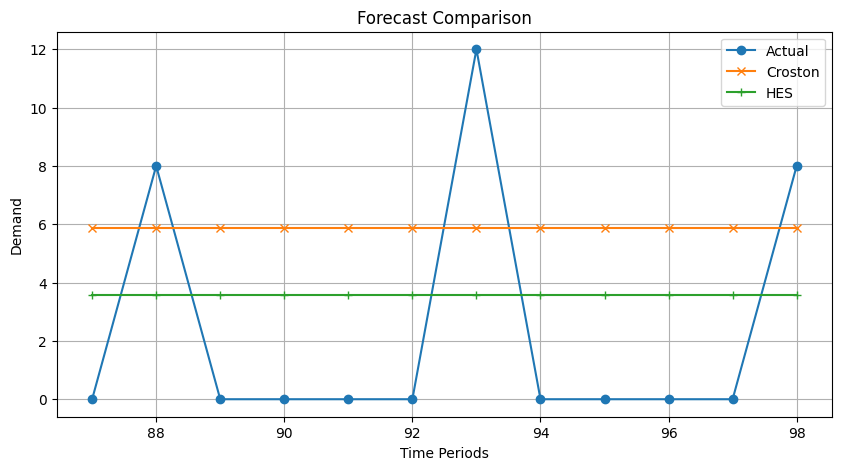

In [159]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Data
data = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 10, 0, 0, 12, 0, 0, 0, 0, 0, 0, 2, 0, 8, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 40, 10, 0, 38, 60, 0, 0, 0, 0, 8, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 12, 0, 0, 0, 0, 8])
# Define the length of the forecast
extra_periods = 12
train = data[:-extra_periods]  # Training data excludes the last 'extra_periods' data points
test = data[-extra_periods:]   # Test data includes only the last 'extra_periods' data points
croston_forecast = croston_basic(train, extra_periods=12)

# Hyperbolic-Exponential Smoothing
def hyperbolic_exponential_smoothing(ts, extra_periods=12, alpha=0.1, gamma=0.1):
    d = np.array(ts)
    n = len(d)
    d = np.append(d, [np.nan] * extra_periods)

    # Initialization
    forecasts = np.zeros(n + extra_periods)
    demand_indices = np.where(d > 0)[0]
    if len(demand_indices) == 0:
        return forecasts

    # Levels and hyperbolic factors initialization
    z = d[demand_indices[0]]
    h = 1.0 / (1 + demand_indices[0])  # Hyperbolic smoothing component

    for i in range(1, len(demand_indices)):
        interval = demand_indices[i] - demand_indices[i - 1]
        z = (1 - alpha) * z + alpha * d[demand_indices[i]]
        h = (1 - gamma) * h + gamma * (1.0 / (interval + 1))

    forecasts[n:] = z * h
    return forecasts[-extra_periods:]

# Applying the Hyperbolic-Exponential Smoothing
hes_forecast = hyperbolic_exponential_smoothing(train, extra_periods=extra_periods)

# Calculate RMSE, MSE, and MAE for Croston and HES
croston_rmse = mean_squared_error(test, croston_forecast, squared=False)  # Ensure croston_forecast also forecasts 12 periods
hes_rmse = mean_squared_error(test, hes_forecast, squared=False)
croston_mse = mean_squared_error(test, croston_forecast)
hes_mse = mean_squared_error(test, hes_forecast)
croston_mae = mean_absolute_error(test, croston_forecast)
hes_mae = mean_absolute_error(test, hes_forecast)

# Print error metrics
print("Croston RMSE:", croston_rmse)
print("HES RMSE:", hes_rmse)
print("Croston MSE:", croston_mse)
print("HES MSE:", hes_mse)
print("Croston MAE:", croston_mae)
print("HES MAE:", hes_mae)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(range(len(data)-12, len(data)), test, label='Actual', marker='o')
plt.plot(range(len(data)-12, len(data)), croston_forecast, label='Croston', marker='x')
plt.plot(range(len(data)-12, len(data)), hes_forecast, label='HES', marker='+')
plt.title('Forecast Comparison')
plt.xlabel('Time Periods')
plt.ylabel('Demand')
plt.legend()
plt.grid(True)
plt.show()


C:\Users\salih\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\salih\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Croston RMSE: 15.20126082419483
HES RMSE: 10.866125901056666
Croston MSE: 231.07833064520048
HES MSE: 118.07269209761455
Croston MAE: 15.187549637072264
HES MAE: 10.846936223235938


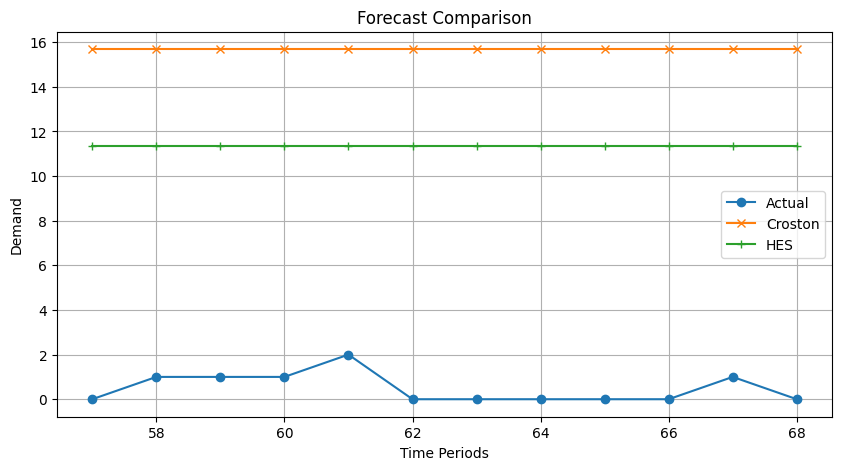

In [160]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Data
data = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 121, 1, 0, 500, 30, 0, 0, 1, 0, 1, 0, 1, 1, 1, 2, 0, 0, 0, 0, 0, 1, 0])
# Define the length of the forecast
extra_periods = 12
train = data[:-extra_periods]  # Training data excludes the last 'extra_periods' data points
test = data[-extra_periods:]   # Test data includes only the last 'extra_periods' data points
croston_forecast = croston_basic(train, extra_periods=12)

# Hyperbolic-Exponential Smoothing
def hyperbolic_exponential_smoothing(ts, extra_periods=12, alpha=0.1, gamma=0.1):
    d = np.array(ts)
    n = len(d)
    d = np.append(d, [np.nan] * extra_periods)

    # Initialization
    forecasts = np.zeros(n + extra_periods)
    demand_indices = np.where(d > 0)[0]
    if len(demand_indices) == 0:
        return forecasts

    # Levels and hyperbolic factors initialization
    z = d[demand_indices[0]]
    h = 1.0 / (1 + demand_indices[0])  # Hyperbolic smoothing component

    for i in range(1, len(demand_indices)):
        interval = demand_indices[i] - demand_indices[i - 1]
        z = (1 - alpha) * z + alpha * d[demand_indices[i]]
        h = (1 - gamma) * h + gamma * (1.0 / (interval + 1))

    forecasts[n:] = z * h
    return forecasts[-extra_periods:]

# Applying the Hyperbolic-Exponential Smoothing
hes_forecast = hyperbolic_exponential_smoothing(train, extra_periods=extra_periods)

# Calculate RMSE, MSE, and MAE for Croston and HES
croston_rmse = mean_squared_error(test, croston_forecast, squared=False)  # Ensure croston_forecast also forecasts 12 periods
hes_rmse = mean_squared_error(test, hes_forecast, squared=False)
croston_mse = mean_squared_error(test, croston_forecast)
hes_mse = mean_squared_error(test, hes_forecast)
croston_mae = mean_absolute_error(test, croston_forecast)
hes_mae = mean_absolute_error(test, hes_forecast)

# Print error metrics
print("Croston RMSE:", croston_rmse)
print("HES RMSE:", hes_rmse)
print("Croston MSE:", croston_mse)
print("HES MSE:", hes_mse)
print("Croston MAE:", croston_mae)
print("HES MAE:", hes_mae)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(range(len(data)-12, len(data)), test, label='Actual', marker='o')
plt.plot(range(len(data)-12, len(data)), croston_forecast, label='Croston', marker='x')
plt.plot(range(len(data)-12, len(data)), hes_forecast, label='HES', marker='+')
plt.title('Forecast Comparison')
plt.xlabel('Time Periods')
plt.ylabel('Demand')
plt.legend()
plt.grid(True)
plt.show()


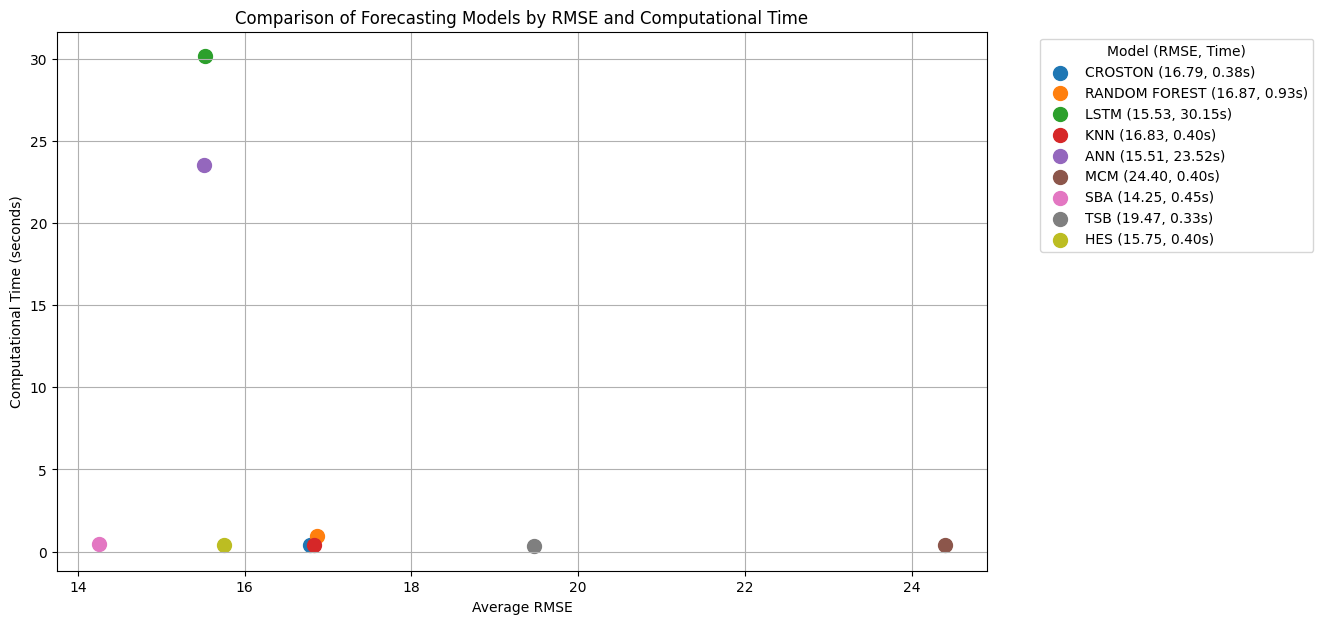

In [161]:
import numpy as np

# Data from RMSE extraction
rmse_data = {
    'CROSTON': [28.2941, 18.2114, 5.4472, 15.2013],
    'RANDOM FOREST': [34.3968, 18.2367, 4.5032, 10.3522],
    'LSTM': [27.9902, 18.1961, 4.8147, 11.1079],
    'KNN': [27.7122, 18.3449, 10.1414, 11.1079],
    'ANN': [27.9617, 18.6078, 5.0680, 10.4145],
    'MCM': [41.0139, 22.3572, 6.8720, 27.3450],
    'SBA': [28.1210, 18.2247, 4.2277, 6.4423],
    'TSB': [35.4730, 19.4651, 5.4128, 17.5275],
    'HES': [29.5795, 18.2115, 4.3266, 10.8661]
}

# Calculating average RMSE for each model
avg_rmse = {model: np.mean(rmses) for model, rmses in rmse_data.items()}

# Computational times data from image
comp_time = {
    'CROSTON': 0.375,
    'RANDOM FOREST': 0.925,
    'LSTM': 30.15,
    'KNN': 0.4,
    'ANN': 23.52,
    'MCM': 0.4,
    'SBA': 0.45,
    'TSB': 0.325,
    'HES': 0.4
}

# Create scatter plot
plt.figure(figsize=(12, 7))
for model, time in comp_time.items():
    plt.scatter(avg_rmse[model], time, s=100, label=f'{model} ({avg_rmse[model]:.2f}, {time:.2f}s)')

plt.title('Comparison of Forecasting Models by RMSE and Computational Time')
plt.xlabel('Average RMSE')
plt.ylabel('Computational Time (seconds)')
plt.legend(title='Model (RMSE, Time)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()
